# Stock Market Data Analysis, Visualization and Best Predictive Models Development

## MJS Stock Market Data Analysis

## Project Goal
Develop a comprehensive analysis of at least four stocks, including:
* ● Data collection and cleaning
* ● Exploratory Data Analysis (EDA)
* ● Predictive modeling for price forecasting
* ● Interactive dashboard development

 ### Selected stocks
 1. Airbnb (ABNB)
 2. Booking Holdings (BKNG)
 3. Expedia (EXPE), and
 4. Marriott International (MAR)

In [60]:
!pip install yfinance

In [61]:
!pip install statsmodels

In [62]:
!pip install pmdarima

In [63]:
!pip install prophet

In [64]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

In [65]:
# libraies imported
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Collection:

In [66]:
## fetching data Airbnb (ABNB)

# Short Range: data for a 1 month period with time-interval of 2 minutes.


# Define stock symbol and the timeframe
symbol = 'ABNB'
data_abnb_sr = yf.download(symbol, period="1mo", interval="2m")

print(data_abnb_sr.head())

# Checkink the size
data_abnb_sr.shape


[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           ABNB        ABNB        ABNB        ABNB   
Datetime                                                                    
2025-01-06 14:30:00+00:00  137.529999  137.570007  136.676605  137.000000   
2025-01-06 14:32:00+00:00  137.330002  137.869995  137.330002  137.500000   
2025-01-06 14:34:00+00:00  137.380005  137.520706  137.229996  137.279999   
2025-01-06 14:36:00+00:00  137.625000  137.689896  137.289993  137.354996   
2025-01-06 14:38:00+00:00  137.410004  137.600006  137.199997  137.600006   

Price                     Volume  
Ticker                      ABNB  
Datetime                          
2025-01-06 14:30:00+00:00  95182  
2025-01-06 14:32:00+00:00  31252  
2025-01-06 14:34:00+00:00  22180  
2025-01-06 14:36:00+00:00  42074  
2025-01-06 14:38:00+00:00  36613  


(4092, 5)

<Axes: xlabel='Datetime'>

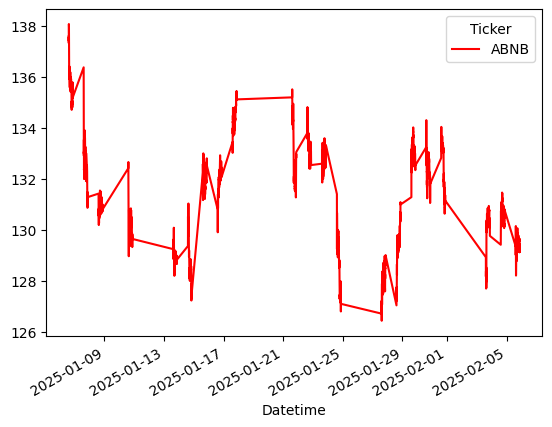

In [67]:
data_abnb_sr.plot.line(y="Close", use_index=True, color='red')


In [68]:
# converting into dataframe
ABNB_df_sr =pd.DataFrame(data_abnb_sr)

# creating a new column Stock
ABNB_df_sr['Stock'] = 'ABNB'

# Reset the index to move the date column into the dataFrame
ABNB_df_sr.reset_index(inplace=True)
print(ABNB_df_sr.head())

Price                   Datetime       Close        High         Low  \
Ticker                                  ABNB        ABNB        ABNB   
0      2025-01-06 14:30:00+00:00  137.529999  137.570007  136.676605   
1      2025-01-06 14:32:00+00:00  137.330002  137.869995  137.330002   
2      2025-01-06 14:34:00+00:00  137.380005  137.520706  137.229996   
3      2025-01-06 14:36:00+00:00  137.625000  137.689896  137.289993   
4      2025-01-06 14:38:00+00:00  137.410004  137.600006  137.199997   

Price         Open Volume Stock  
Ticker        ABNB   ABNB        
0       137.000000  95182  ABNB  
1       137.500000  31252  ABNB  
2       137.279999  22180  ABNB  
3       137.354996  42074  ABNB  
4       137.600006  36613  ABNB  


In [69]:
# Renaming all columns
ABNB_df_sr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']
print(ABNB_df_sr.head())

                       Date       Close        High         Low        Open  \
0 2025-01-06 14:30:00+00:00  137.529999  137.570007  136.676605  137.000000   
1 2025-01-06 14:32:00+00:00  137.330002  137.869995  137.330002  137.500000   
2 2025-01-06 14:34:00+00:00  137.380005  137.520706  137.229996  137.279999   
3 2025-01-06 14:36:00+00:00  137.625000  137.689896  137.289993  137.354996   
4 2025-01-06 14:38:00+00:00  137.410004  137.600006  137.199997  137.600006   

   Volume Stock  
0   95182  ABNB  
1   31252  ABNB  
2   22180  ABNB  
3   42074  ABNB  
4   36613  ABNB  


In [70]:
data_abnb_sr['Datetime'] = data_abnb_sr.index.strftime('%Y-%m-%d %H:%M')
##data_abnb_sr_df=pd.read_csv(data_abnb_sr.to_csv(f"{symbol}_short_range.csv"))
print(data_abnb_sr.head())
data_abnb_sr.columns
data_abnb_sr.info()

Price                           Close        High         Low        Open  \
Ticker                           ABNB        ABNB        ABNB        ABNB   
Datetime                                                                    
2025-01-06 14:30:00+00:00  137.529999  137.570007  136.676605  137.000000   
2025-01-06 14:32:00+00:00  137.330002  137.869995  137.330002  137.500000   
2025-01-06 14:34:00+00:00  137.380005  137.520706  137.229996  137.279999   
2025-01-06 14:36:00+00:00  137.625000  137.689896  137.289993  137.354996   
2025-01-06 14:38:00+00:00  137.410004  137.600006  137.199997  137.600006   

Price                     Volume          Datetime  
Ticker                      ABNB                    
Datetime                                            
2025-01-06 14:30:00+00:00  95182  2025-01-06 14:30  
2025-01-06 14:32:00+00:00  31252  2025-01-06 14:32  
2025-01-06 14:34:00+00:00  22180  2025-01-06 14:34  
2025-01-06 14:36:00+00:00  42074  2025-01-06 14:36  
2025-01-06 1

In [71]:
fig = go.Figure(data=[go.Candlestick(x=ABNB_df_sr['Date'],
                open=ABNB_df_sr['Open'],
                high=ABNB_df_sr['High'],
                low=ABNB_df_sr['Low'],
                close=ABNB_df_sr['Close'])])

fig.show()

In [72]:
print(data_abnb_sr.index)

DatetimeIndex(['2025-01-06 14:30:00+00:00', '2025-01-06 14:32:00+00:00',
               '2025-01-06 14:34:00+00:00', '2025-01-06 14:36:00+00:00',
               '2025-01-06 14:38:00+00:00', '2025-01-06 14:40:00+00:00',
               '2025-01-06 14:42:00+00:00', '2025-01-06 14:44:00+00:00',
               '2025-01-06 14:46:00+00:00', '2025-01-06 14:48:00+00:00',
               ...
               '2025-02-05 20:40:00+00:00', '2025-02-05 20:42:00+00:00',
               '2025-02-05 20:44:00+00:00', '2025-02-05 20:46:00+00:00',
               '2025-02-05 20:48:00+00:00', '2025-02-05 20:50:00+00:00',
               '2025-02-05 20:52:00+00:00', '2025-02-05 20:54:00+00:00',
               '2025-02-05 20:56:00+00:00', '2025-02-05 20:58:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=4092, freq=None)


In [73]:
## fetching data Booking Holdings (BKNG)
symbol = 'BKNG'


# Short Range: data for a 1 month period with time-interval of 2 minutes.
data_bkng_sr = yf.download(symbol, period="1mo", interval="2m")

print(data_bkng_sr.head())

# Checkink the size
data_bkng_sr.shape

[*********************100%***********************]  1 of 1 completed

Price                            Close         High          Low         Open  \
Ticker                            BKNG         BKNG         BKNG         BKNG   
Datetime                                                                        
2025-01-06 14:30:00+00:00  4942.669922  4942.669922  4942.669922  4942.669922   
2025-01-06 14:32:00+00:00  4940.549805  4940.549805  4940.549805  4940.549805   
2025-01-06 14:34:00+00:00  4915.020020  4934.919922  4911.979980  4934.919922   
2025-01-06 14:40:00+00:00  4917.009766  4917.009766  4905.689941  4906.029785   
2025-01-06 14:44:00+00:00  4875.000000  4893.049805  4875.000000  4893.049805   

Price                     Volume  
Ticker                      BKNG  
Datetime                          
2025-01-06 14:30:00+00:00  32909  
2025-01-06 14:32:00+00:00    650  
2025-01-06 14:34:00+00:00   2194  
2025-01-06 14:40:00+00:00   3798  
2025-01-06 14:44:00+00:00   5710  


(2347, 5)

<Axes: xlabel='Datetime'>

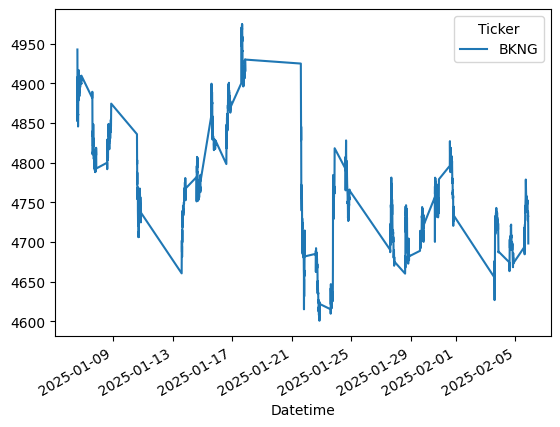

In [74]:
data_bkng_sr.plot.line(y="Close", use_index=True)

In [75]:
# converting into dataframe
BKNG_df_sr =pd.DataFrame(data_bkng_sr)

# creating a new column Stock
BKNG_df_sr['Stock'] = 'BKNG'

# Reset the index to move the date column into the dataFrame
BKNG_df_sr.reset_index(inplace=True)

# Renaming all columns
BKNG_df_sr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(BKNG_df_sr.head())

                       Date        Close         High          Low  \
0 2025-01-06 14:30:00+00:00  4942.669922  4942.669922  4942.669922   
1 2025-01-06 14:32:00+00:00  4940.549805  4940.549805  4940.549805   
2 2025-01-06 14:34:00+00:00  4915.020020  4934.919922  4911.979980   
3 2025-01-06 14:40:00+00:00  4917.009766  4917.009766  4905.689941   
4 2025-01-06 14:44:00+00:00  4875.000000  4893.049805  4875.000000   

          Open  Volume Stock  
0  4942.669922   32909  BKNG  
1  4940.549805     650  BKNG  
2  4934.919922    2194  BKNG  
3  4906.029785    3798  BKNG  
4  4893.049805    5710  BKNG  


In [76]:
## fetching data Expedia (EXPE)
symbol = 'EXPE'

# Short Range: data for a 1 month period with time-interval of 2 minutes.
data_expe_sr = yf.download(symbol, period="1mo", interval="2m")
print(data_expe_sr.head())

# Checkink the size
data_expe_sr.shape

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           EXPE        EXPE        EXPE        EXPE   
Datetime                                                                    
2025-01-06 14:30:00+00:00  187.369995  188.000000  187.330002  188.000000   
2025-01-06 14:32:00+00:00  185.800003  187.803604  185.690002  187.369995   
2025-01-06 14:34:00+00:00  186.044998  186.684998  186.000000  186.514999   
2025-01-06 14:36:00+00:00  186.002502  186.005005  185.554993  185.962204   
2025-01-06 14:38:00+00:00  185.389999  185.955002  184.934998  185.865005   

Price                     Volume  
Ticker                      EXPE  
Datetime                          
2025-01-06 14:30:00+00:00  24816  
2025-01-06 14:32:00+00:00   8815  
2025-01-06 14:34:00+00:00   3436  
2025-01-06 14:36:00+00:00   8174  
2025-01-06 14:38:00+00:00   8650  


(4045, 5)

<Axes: xlabel='Datetime'>

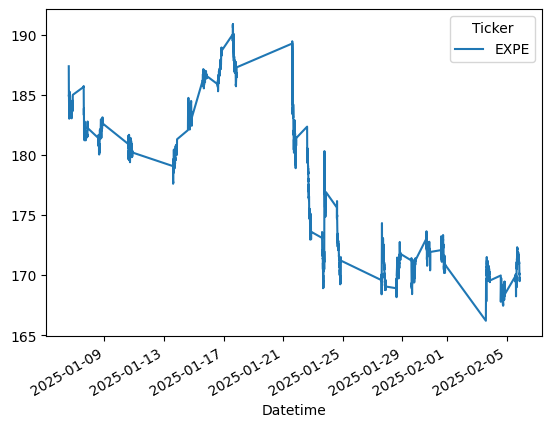

In [77]:
data_expe_sr.plot.line(y="Close", use_index=True)

In [78]:
# converting into dataframe
EXPE_df_sr =pd.DataFrame(data_expe_sr)

# creating a new column Stock
EXPE_df_sr['Stock'] = 'EXPE'

# Reset the index to move the date column into the dataFrame
EXPE_df_sr.reset_index(inplace=True)

# Renaming all columns
EXPE_df_sr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(EXPE_df_sr.head())

                       Date       Close        High         Low        Open  \
0 2025-01-06 14:30:00+00:00  187.369995  188.000000  187.330002  188.000000   
1 2025-01-06 14:32:00+00:00  185.800003  187.803604  185.690002  187.369995   
2 2025-01-06 14:34:00+00:00  186.044998  186.684998  186.000000  186.514999   
3 2025-01-06 14:36:00+00:00  186.002502  186.005005  185.554993  185.962204   
4 2025-01-06 14:38:00+00:00  185.389999  185.955002  184.934998  185.865005   

   Volume Stock  
0   24816  EXPE  
1    8815  EXPE  
2    3436  EXPE  
3    8174  EXPE  
4    8650  EXPE  


In [79]:
## fetching data Marriott International (MAR)
symbol = 'MAR'
# Short Range: data for a 1 month period with time-interval of 2 minutes.
data_mar_sr = yf.download(symbol, period="1mo", interval="2m")
print(data_mar_sr.head())


# Checking the size
data_mar_sr.shape

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                            MAR         MAR         MAR         MAR   
Datetime                                                                    
2025-01-06 14:30:00+00:00  274.600006  275.320007  274.600006  275.320007   
2025-01-06 14:32:00+00:00  275.010010  275.375000  274.989990  274.989990   
2025-01-06 14:34:00+00:00  274.600006  275.109985  274.600006  275.109985   
2025-01-06 14:36:00+00:00  275.084991  275.170013  274.644989  274.720001   
2025-01-06 14:38:00+00:00  275.049988  275.470001  274.929993  275.190002   

Price                     Volume  
Ticker                       MAR  
Datetime                          
2025-01-06 14:30:00+00:00  18171  
2025-01-06 14:32:00+00:00   3643  
2025-01-06 14:34:00+00:00   3134  
2025-01-06 14:36:00+00:00   5389  
2025-01-06 14:38:00+00:00   5769  


(4028, 5)

In [80]:
# converting into dataframe
MAR_df_sr =pd.DataFrame(data_mar_sr)

# creating a new column Stock
MAR_df_sr['Stock'] = 'MAR'

# Reset the index to move the date column into the dataFrame
MAR_df_sr.reset_index(inplace=True)

# Renaming all columns
MAR_df_sr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(MAR_df_sr.head())

                       Date       Close        High         Low        Open  \
0 2025-01-06 14:30:00+00:00  274.600006  275.320007  274.600006  275.320007   
1 2025-01-06 14:32:00+00:00  275.010010  275.375000  274.989990  274.989990   
2 2025-01-06 14:34:00+00:00  274.600006  275.109985  274.600006  275.109985   
3 2025-01-06 14:36:00+00:00  275.084991  275.170013  274.644989  274.720001   
4 2025-01-06 14:38:00+00:00  275.049988  275.470001  274.929993  275.190002   

   Volume Stock  
0   18171   MAR  
1    3643   MAR  
2    3134   MAR  
3    5389   MAR  
4    5769   MAR  


In [81]:
# compbining the four dataframes
combine_stock_df = pd.concat([ABNB_df_sr,BKNG_df_sr,EXPE_df_sr,MAR_df_sr], axis=0)

print(combine_stock_df)

                          Date       Close        High         Low  \
0    2025-01-06 14:30:00+00:00  137.529999  137.570007  136.676605   
1    2025-01-06 14:32:00+00:00  137.330002  137.869995  137.330002   
2    2025-01-06 14:34:00+00:00  137.380005  137.520706  137.229996   
3    2025-01-06 14:36:00+00:00  137.625000  137.689896  137.289993   
4    2025-01-06 14:38:00+00:00  137.410004  137.600006  137.199997   
...                        ...         ...         ...         ...   
4023 2025-02-05 20:50:00+00:00  291.970001  292.059998  291.739990   
4024 2025-02-05 20:52:00+00:00  291.869995  291.970001  291.630005   
4025 2025-02-05 20:54:00+00:00  291.980011  292.170013  291.605011   
4026 2025-02-05 20:56:00+00:00  292.279999  292.290009  291.924988   
4027 2025-02-05 20:58:00+00:00  292.368988  292.489990  292.190002   

            Open  Volume Stock  
0     137.000000   95182  ABNB  
1     137.500000   31252  ABNB  
2     137.279999   22180  ABNB  
3     137.354996   42074  A

In [82]:
# Description of Data in the Dataframe and rounding its values up to two decimal places

combine_stock_df.describe().round(2)


,Close,High,Low,Open,Volume
count,14512.00,14512.00,14512.00,14512.00,14512.00
mean,934.82,935.18,934.48,934.84,8478.55
std,1682.65,1683.23,1682.13,1682.70,14845.16
min,126.43,126.53,125.91,125.92,103.00
25%,133.97,134.05,133.88,133.97,2087.75
50%,183.51,183.63,183.40,183.51,4554.50
75%,288.21,288.32,287.96,288.09,9433.25
max,4974.78,4976.96,4974.78,4974.99,363612.00


In [83]:
# converting the "Date" column dtype from object to date
combine_stock_df["Date"] = pd.to_datetime(combine_stock_df["Date"])

## Data Cleaning:
* ■ Handle missing values (e.g., forward fill, backward fill, interpolation).
* ■ Address outliers (e.g., Winsorization, removal).
* ■ Clean and preprocess data for further analysis

### Handle missing Values

In [84]:
# Checking the missing Value

print(combine_stock_df.isna().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Stock     0
dtype: int64


In [85]:
combine_stock_df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
Stock,0


In [86]:
## Viewing Datatypes of all columns
combine_stock_df.info()
combine_stock_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14512 entries, 0 to 4027
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    14512 non-null  datetime64[ns, UTC]
 1   Close   14512 non-null  float64            
 2   High    14512 non-null  float64            
 3   Low     14512 non-null  float64            
 4   Open    14512 non-null  float64            
 5   Volume  14512 non-null  int64              
 6   Stock   14512 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 907.0+ KB


,Date,Close,High,Low,Open,Volume,Stock
0,2025-01-06 14:30:00+00:00,137.529999,137.570007,136.676605,137.000000,95182,ABNB
1,2025-01-06 14:32:00+00:00,137.330002,137.869995,137.330002,137.500000,31252,ABNB
2,2025-01-06 14:34:00+00:00,137.380005,137.520706,137.229996,137.279999,22180,ABNB
3,2025-01-06 14:36:00+00:00,137.625000,137.689896,137.289993,137.354996,42074,ABNB
4,2025-01-06 14:38:00+00:00,137.410004,137.600006,137.199997,137.600006,36613,ABNB


In [87]:
# Handle missing Values


## Address outliers

In [88]:
ABNB_df_sr.head()

,Date,Close,High,Low,Open,Volume,Stock
0,2025-01-06 14:30:00+00:00,137.529999,137.570007,136.676605,137.000000,95182,ABNB
1,2025-01-06 14:32:00+00:00,137.330002,137.869995,137.330002,137.500000,31252,ABNB
2,2025-01-06 14:34:00+00:00,137.380005,137.520706,137.229996,137.279999,22180,ABNB
3,2025-01-06 14:36:00+00:00,137.625000,137.689896,137.289993,137.354996,42074,ABNB
4,2025-01-06 14:38:00+00:00,137.410004,137.600006,137.199997,137.600006,36613,ABNB


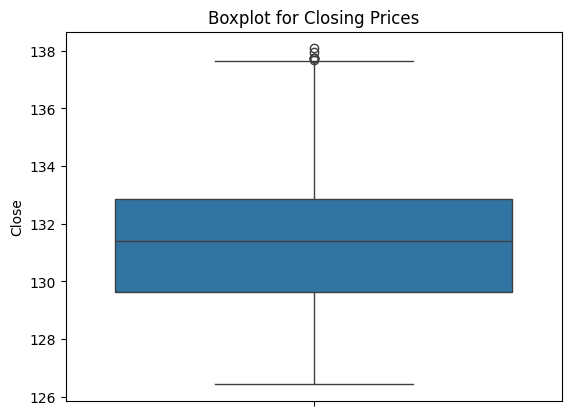

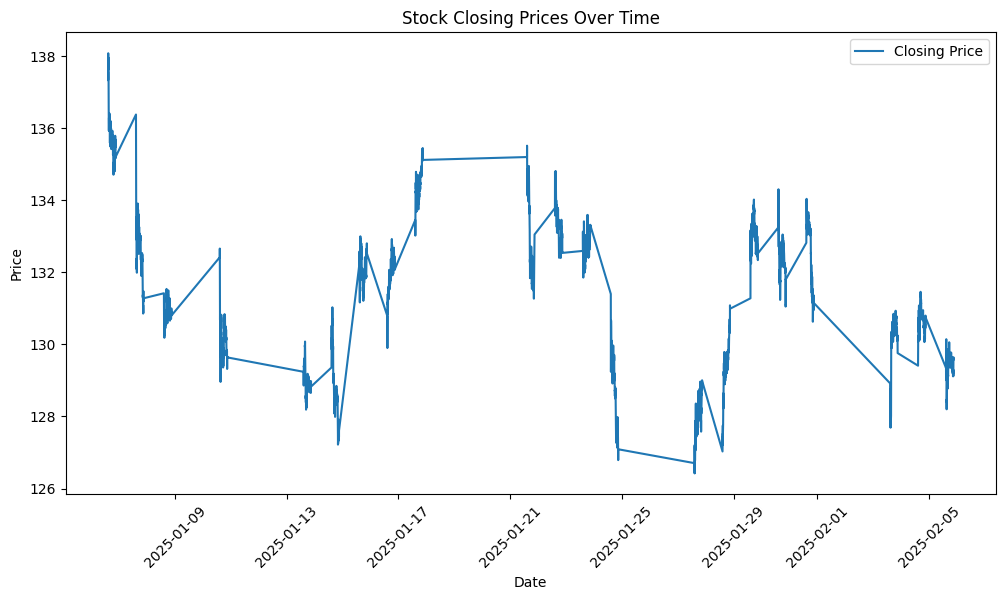

In [89]:
# Address outliers ABNB
sns.boxplot(data=ABNB_df_sr["Close"])
plt.title("Boxplot for Closing Prices")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(ABNB_df_sr["Date"], ABNB_df_sr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [90]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = ABNB_df_sr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = ABNB_df_sr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


3.209991455078125


In [91]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
137.6549835205078 124.81501770019531


#### Handling Outliers , replace with mean

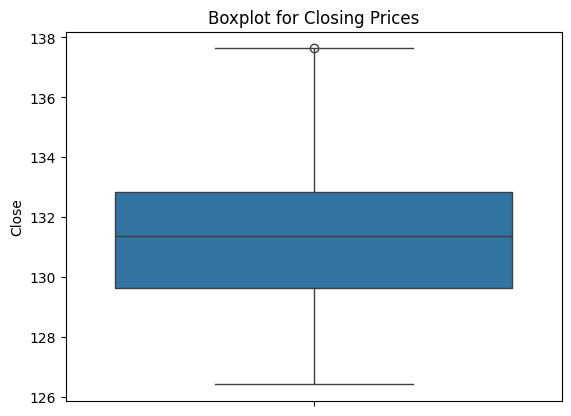

In [92]:
mean_close = ABNB_df_sr[( ABNB_df_sr['Close'] >= lower) & ( ABNB_df_sr['Close'] <= upper)]['Close'].mean()
ABNB_df_sr.loc[(ABNB_df_sr['Close'] < lower) | ( ABNB_df_sr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers ABNB

sns.boxplot(data = ABNB_df_sr["Close"])
plt.title("Boxplot for Closing Prices")
plt.show()

<Axes: ylabel='Close'>

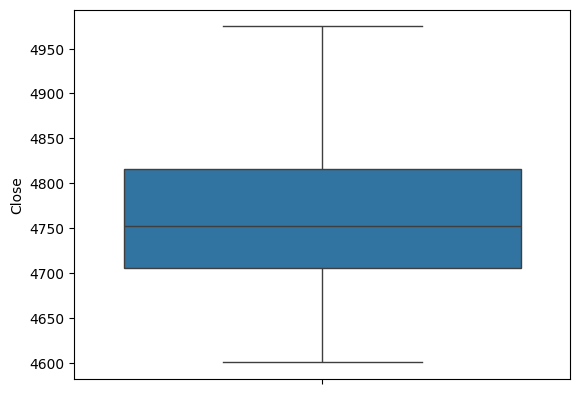

In [93]:
# Adressing outlier BKNG
sns.boxplot(data=BKNG_df_sr["Close"])


<Axes: ylabel='Close'>

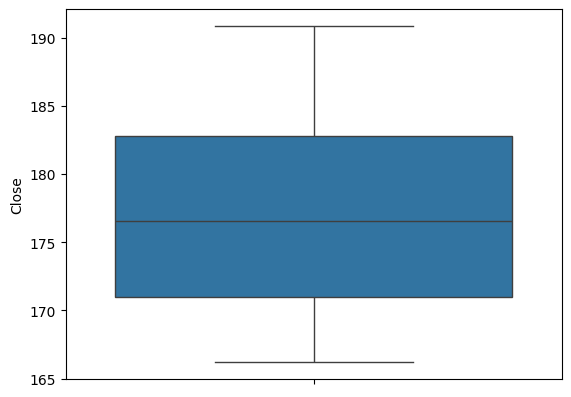

In [94]:
# Adressing outlier EXPE
sns.boxplot(data=EXPE_df_sr["Close"])

In [95]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = EXPE_df_sr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = EXPE_df_sr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


11.81500244140625


In [96]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
200.54750061035156 153.28749084472656


<Axes: ylabel='Close'>

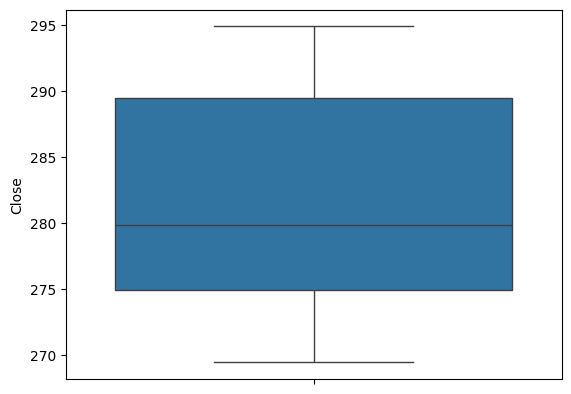

In [97]:
# Adressing outlier MAR
sns.boxplot(data=MAR_df_sr["Close"])

In [98]:
# clean the data

# Exploratory Data Analysis (EDA):

## Univariate Analysis:

### Calculate summary statistics
(mean, median, standard deviation, etc.) for each stock in a given period for example for the last one year, for the last
one month, for the last one week, five days etc.

In [99]:
## Calculate summary statistics
combine_stock_df.describe().round(2)

,Close,High,Low,Open,Volume
count,14512.00,14512.00,14512.00,14512.00,14512.00
mean,934.82,935.18,934.48,934.84,8478.55
std,1682.65,1683.23,1682.13,1682.70,14845.16
min,126.43,126.53,125.91,125.92,103.00
25%,133.97,134.05,133.88,133.97,2087.75
50%,183.51,183.63,183.40,183.51,4554.50
75%,288.21,288.32,287.96,288.09,9433.25
max,4974.78,4976.96,4974.78,4974.99,363612.00


In [100]:
# Descriptive Statistics for each stock
descriptive_stat = combine_stock_df.groupby('Stock')['Close'].describe()
print(descriptive_stat)

        count         mean        std          min          25%          50%  \
Stock                                                                          
ABNB   4092.0   131.367763   2.138920   126.425003   129.630005   131.397499   
BKNG   2347.0  4762.583286  79.309247  4600.555176  4705.125000  4751.895020   
EXPE   4045.0   177.198576   6.535591   166.210007   171.009995   176.580002   
MAR    4028.0   281.525547   7.588319   269.415009   274.873749   279.852509   

               75%          max  
Stock                            
ABNB    132.839996   138.080002  
BKNG   4816.077637  4974.779785  
EXPE    182.824997   190.879898  
MAR     289.462494   294.929993  


Let's the result of each stock:
- ABNB
    - count = 3507, the number of observations(Trading minuties) included in the dataset for ABNB
    mean = 131.75 , the average closing price
    Std = 2.24, Measures the amont of variation or dispersion of closing prices
    min = 126.43, the lowest closing price in the data set
    25th Percentile : 130.21 , 25% of the closing prices are below this value
    Median (50%) : 131.97 , The middle value of the closing prices
    75th Percentile : 133.00 , 75% of the closing prices are below this value
    max = 138.84, the highest closing price in the dataset.
- BKNG
    - kl
    

###  ■ Visualize price trends using line charts and box plots.

<Axes: xlabel='Date', ylabel='Stock'>

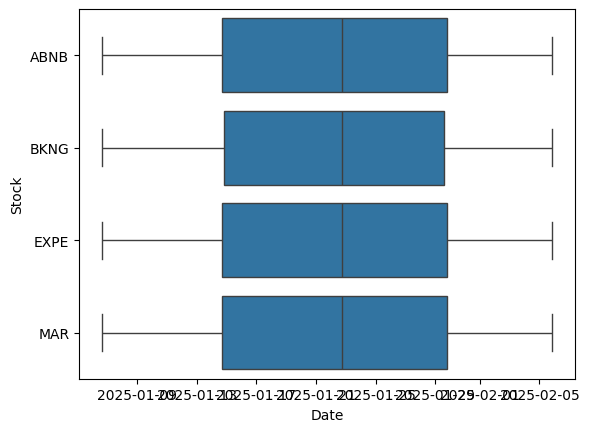

In [101]:
sns.boxplot(data=combine_stock_df, x='Date', y="Stock")

### Comparing the Data


###  ○ Bivariate Analysis:
*  ■ Calculate and visualize correlations between the prices of different stock.
*  ■ Analyze the relationship between price and trading volume.

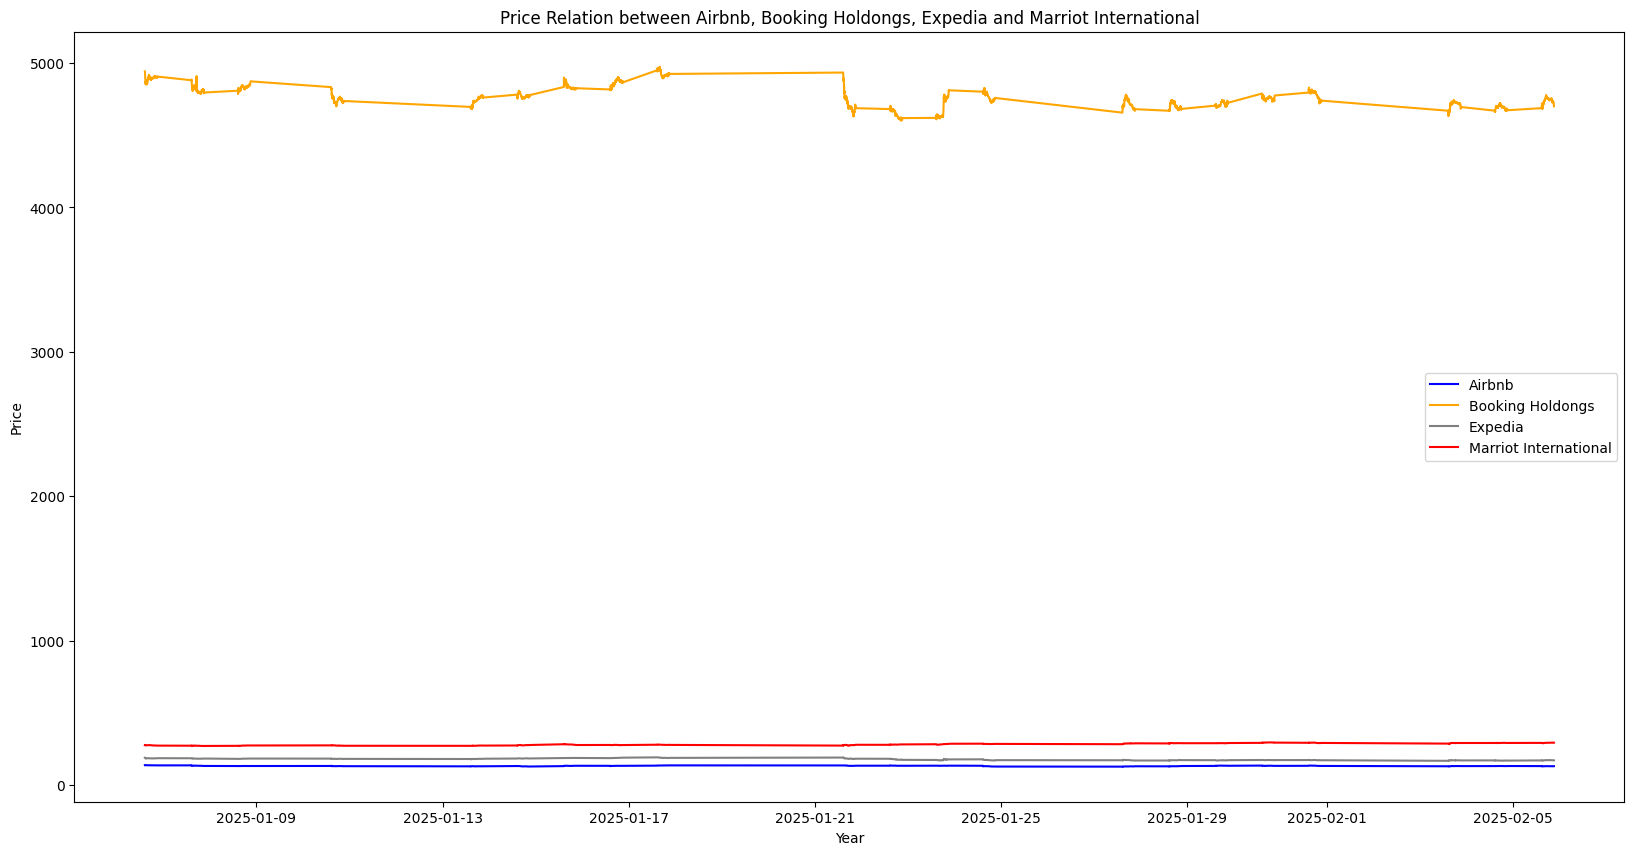

In [102]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_sr['Date'],ABNB_df_sr['Open'], color='blue', label='Airbnb')
plt.plot(BKNG_df_sr['Date'],BKNG_df_sr['Open'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_sr['Date'],EXPE_df_sr['Open'], color='gray', label='Expedia')
plt.plot(MAR_df_sr['Date'],MAR_df_sr['Open'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()


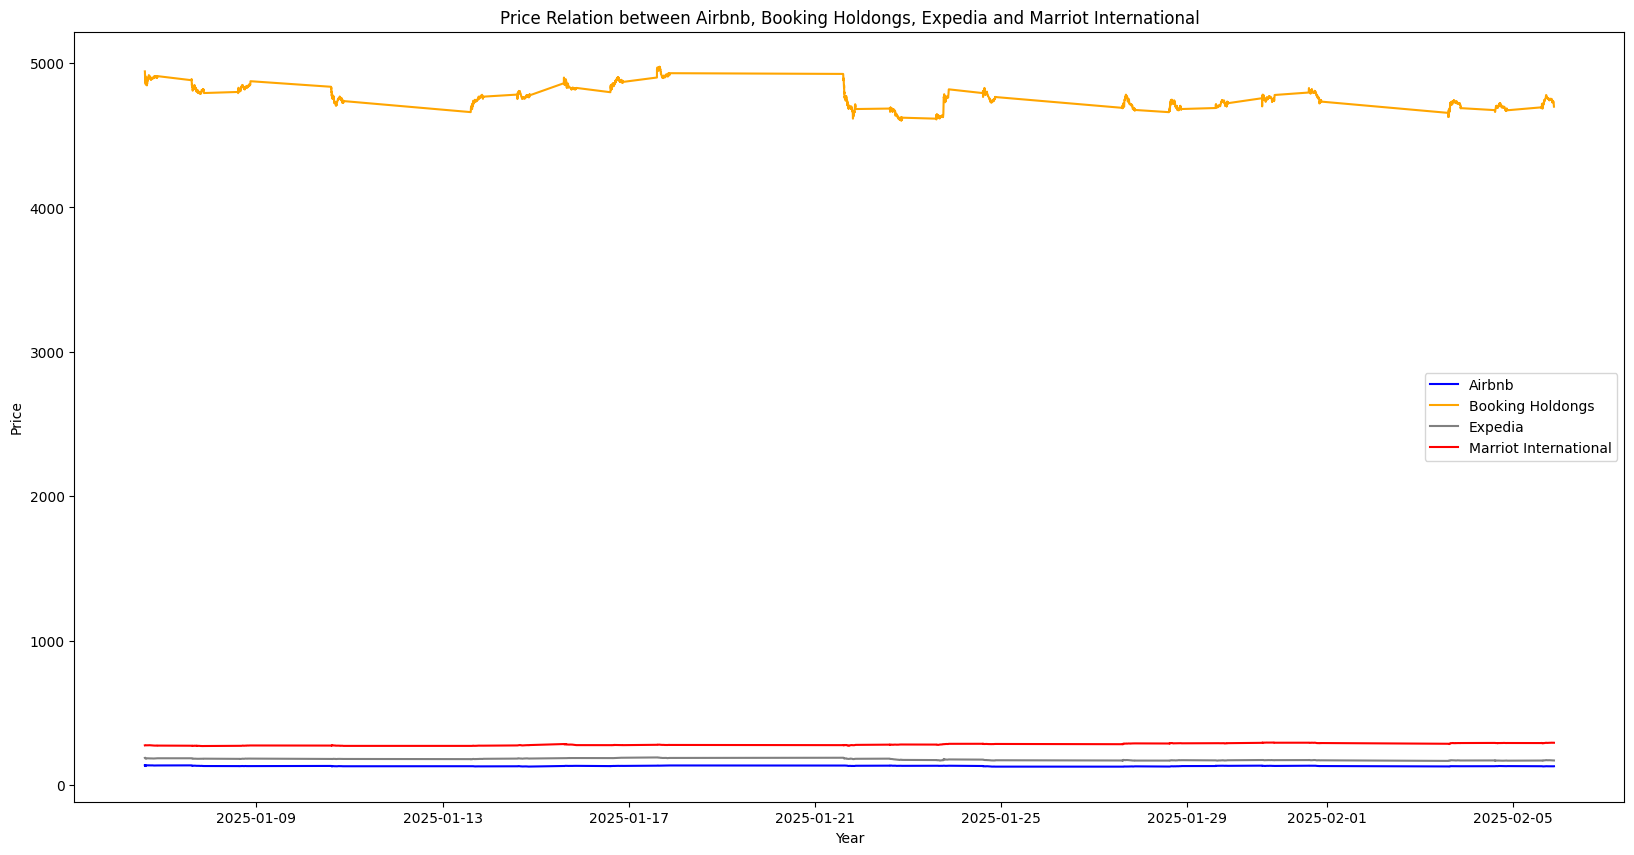

In [103]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_sr['Date'],ABNB_df_sr['Close'], color='blue', label='Airbnb')
plt.plot(BKNG_df_sr['Date'],BKNG_df_sr['Close'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_sr['Date'],EXPE_df_sr['Close'], color='gray', label='Expedia')
plt.plot(MAR_df_sr['Date'],MAR_df_sr['Close'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()

according to the graph above , the price of Booking Holdongs is significantly higher than the others. Marriot International's pricing has been generally upward from its begnning.

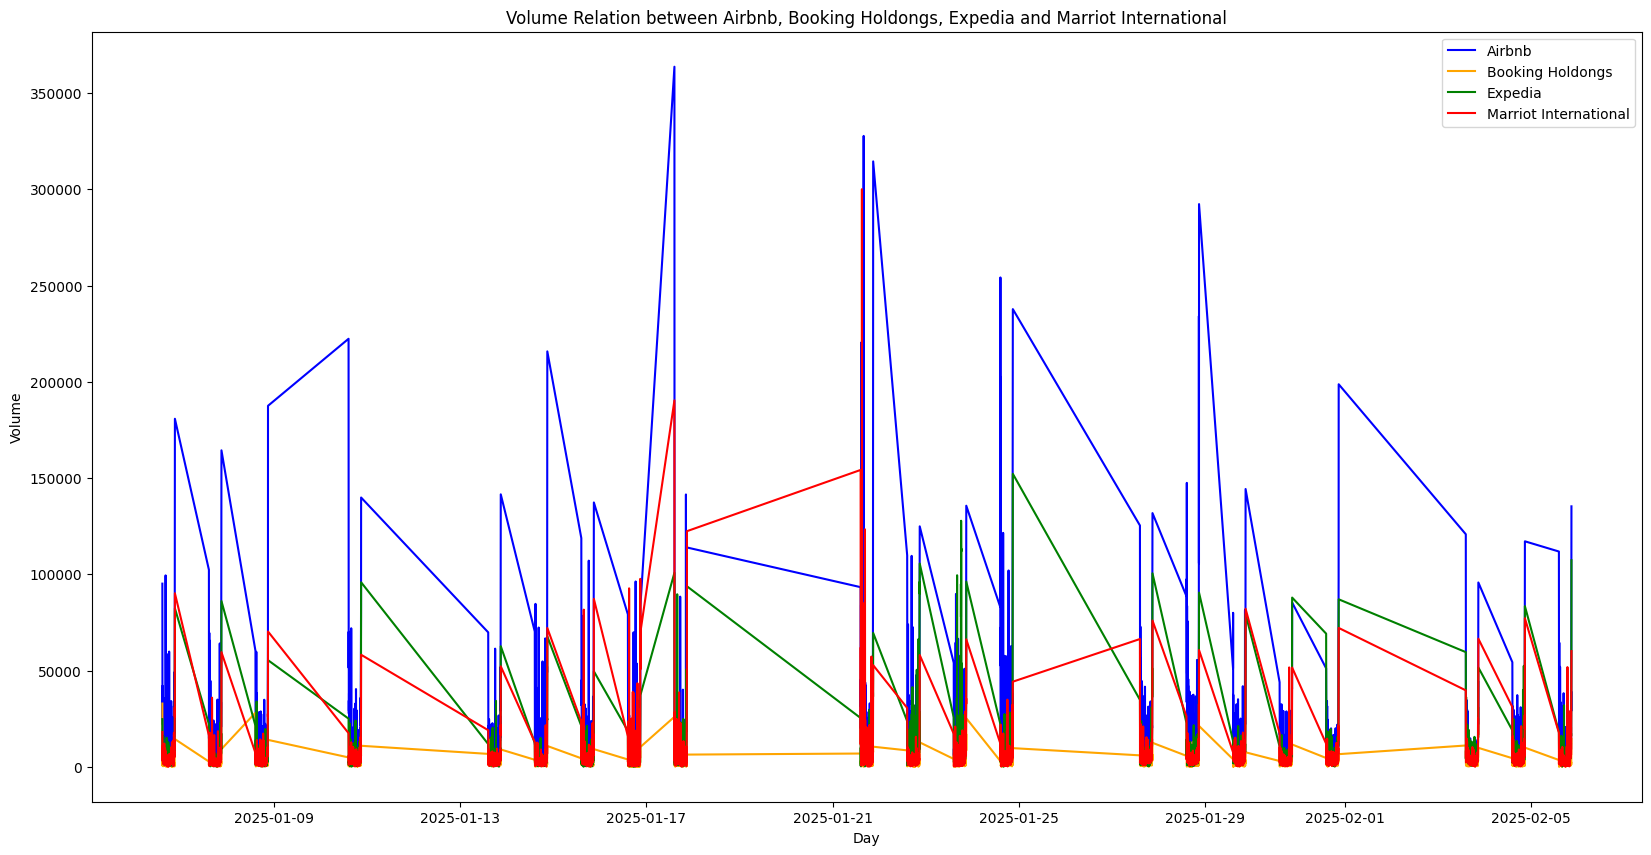

In [104]:
# Volume Comparision
plt.figure(figsize=(20,10))
plt.plot(ABNB_df_sr['Date'],ABNB_df_sr['Volume'], color='blue', label='Airbnb')
plt.plot(BKNG_df_sr['Date'],BKNG_df_sr['Volume'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_sr['Date'],EXPE_df_sr['Volume'], color='green', label='Expedia')
plt.plot(MAR_df_sr['Date'],MAR_df_sr['Volume'], color='red', label='Marriot International')

plt.title("Volume Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Day")
plt.ylabel('Volume')
plt.legend(title="")

plt.show()

-> Trough the price of Booking Holdongs has risen more significantly as compare to others, we can notice from the above graph that Booking Holdongs has the least signifying has been traded less as compared to the other three. after year 2000 Airbnb on other hand has traded the most signifying higher liquidity and better execution.

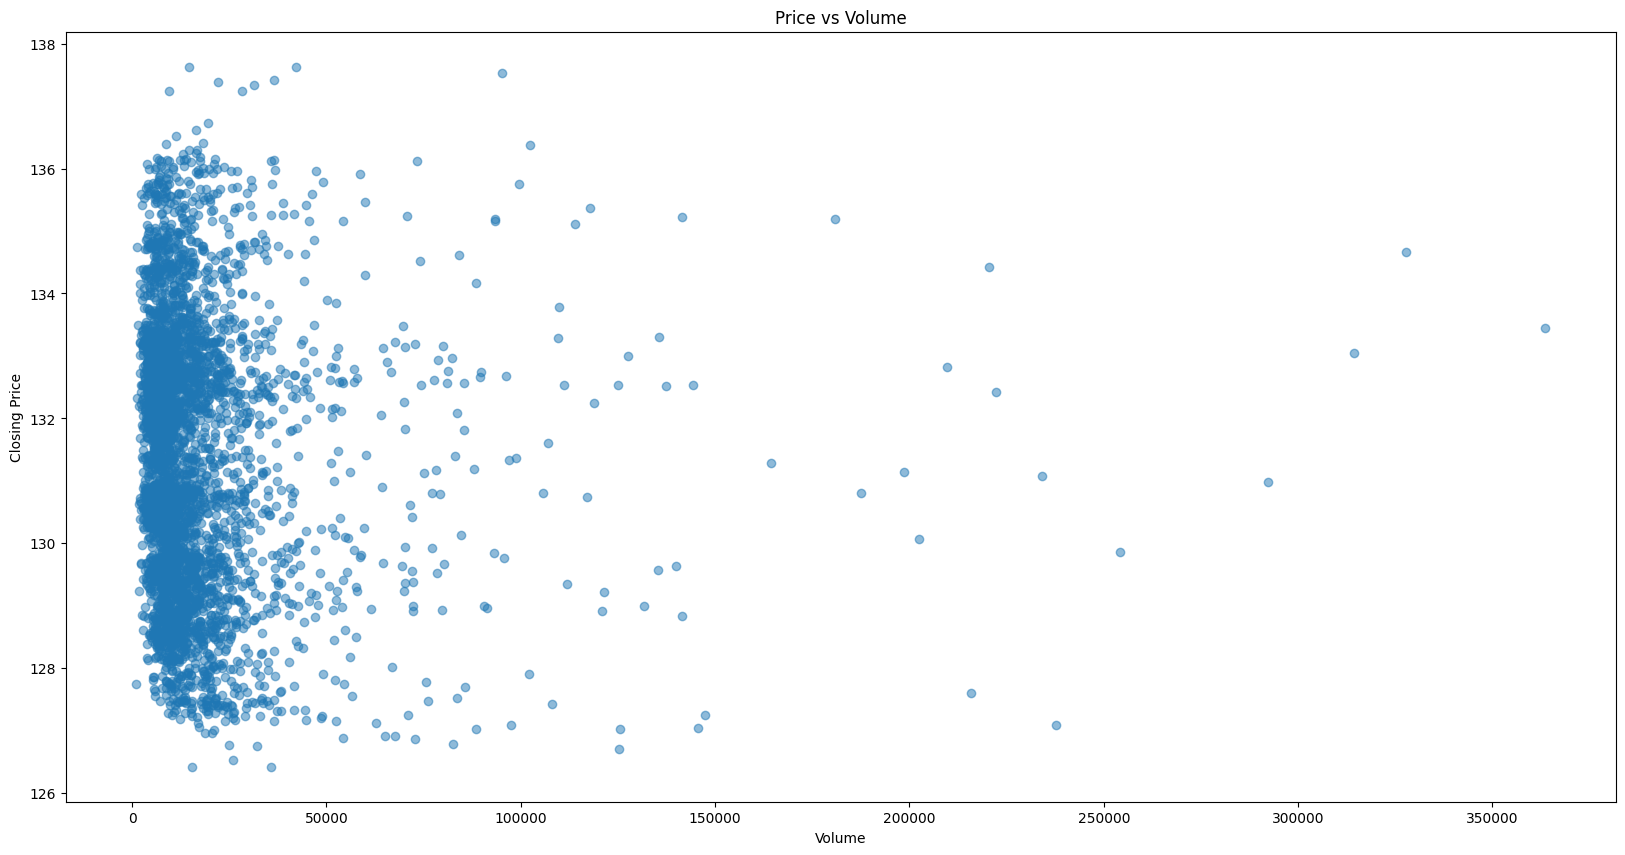

In [105]:
# Volume Comparision
plt.figure(figsize=(20,10))
plt.scatter(ABNB_df_sr['Volume'], ABNB_df_sr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume")
#plt.plot(ABNB_df_sr['Close'],ABNB_df_sr['Volume'], color='blue', label='Airbnb') # Added color='blue'
#plt.plot(BKNG_df_sr['Close'],BKNG_df_sr['Volume'], color='orange', label='Booking Holdongs')
#plt.plot(EXPE_df_sr['Close'],EXPE_df_sr['Volume'], color='green', label='Expedia')
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')


plt.show()
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')




### Time Series Analysis : to examine trends and patterns over time, focussing on the closing Prices

In [106]:
## Time Series Analysis
pivot_data = combine_stock_df.pivot(index='Date', columns='Stock', values='Close')

#create s subplot
fig = make_subplots(rows=1, cols=1)

#Add traces for each stock
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )
#update layout
fig.update_layout(
    title_text='Time series of closing Prices',
    xaxis_title = 'Date',
    yaxis_title = 'Closing Price',
    legend_title="Ticker",
    showlegend = True
)

# Show the plot
fig.show()

### - Volatility Analysis
We will calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [107]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

### Correlation Analysis
to understand how the stock prices of these companies are related to each other

In [108]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Stock',
    yaxis_title='Stock'
)

# Show the figure
fig.show()

The heatmap above displays the correlation matrix of the closing prices of the four stocks (ABNB, BKNG, EXPE, MAR). Here’s what the correlation coefficients suggest:

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicate a lack of correlation.

- From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, BKNG and EXPE seem to have a relatively higher positive correlation (0.748).

#### Comparative Analysis
In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [109]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Stock'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

#### Daily Risk Vs. Return Analysis
- To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

In [110]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

<ipython-input-110-3ae1440913a5>:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



# Predictive Modeling

* Feature Engineering:
> Create new features (moving averages, price momentum, volatility indicators) to improve model performance.

### Feature Engineering

In [111]:
# adding moving average as features for ABNB

ABNB_df_sr['MA_10'] = ABNB_df_sr['Close'].rolling(window=10).mean()
ABNB_df_sr['MA_50'] = ABNB_df_sr['Close'].rolling(window=50).mean()

# adding moving average as features for BKNG

BKNG_df_sr['MA_10'] = BKNG_df_sr['Close'].rolling(window=10).mean()
BKNG_df_sr['MA_50'] = BKNG_df_sr['Close'].rolling(window=50).mean()

# adding moving average as features for EXPE

EXPE_df_sr['MA_10'] = EXPE_df_sr['Close'].rolling(window=10).mean()
EXPE_df_sr['MA_50'] = EXPE_df_sr['Close'].rolling(window=50).mean()

# adding moving average as features for MAR

MAR_df_sr['MA_10'] = MAR_df_sr['Close'].rolling(window=10).mean()
MAR_df_sr['MA_50'] = MAR_df_sr['Close'].rolling(window=50).mean()

print(MAR_df_sr.head(3))
MAR_df_sr.tail(3)


                       Date       Close        High         Low        Open  \
0 2025-01-06 14:30:00+00:00  274.600006  275.320007  274.600006  275.320007   
1 2025-01-06 14:32:00+00:00  275.010010  275.375000  274.989990  274.989990   
2 2025-01-06 14:34:00+00:00  274.600006  275.109985  274.600006  275.109985   

   Volume Stock  MA_10  MA_50  
0   18171   MAR    NaN    NaN  
1    3643   MAR    NaN    NaN  
2    3134   MAR    NaN    NaN  


,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50
4025,2025-02-05 20:54:00+00:00,291.980011,292.170013,291.605011,291.864990,42408,MAR,291.916501,292.446375
4026,2025-02-05 20:56:00+00:00,292.279999,292.290009,291.924988,292.089996,34096,MAR,291.926501,292.446775
4027,2025-02-05 20:58:00+00:00,292.368988,292.489990,292.190002,292.244995,60139,MAR,291.959399,292.446755


#### calculate relative Strength Index (RSI)

In [112]:
# calculate RSI: MEASURES stock momentum for ABNB
delta = ABNB_df_sr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()    # 14 is period
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

ABNB_df_sr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

ABNB_df_sr = ABNB_df_sr.dropna()

print(ABNB_df_sr.head(3))

                        Date       Close        High         Low        Open  \
49 2025-01-06 16:08:00+00:00  135.589996  135.675003  135.589996  135.668793   
50 2025-01-06 16:10:00+00:00  135.750000  135.770004  135.740005  135.750000   
51 2025-01-06 16:12:00+00:00  136.115005  136.119995  135.735001  135.744995   

    Volume Stock       MA_10       MA_50         RSI  
49    2273  ABNB  135.906400  135.650776 -165.755135  
50   99463  ABNB  135.865399  135.615176  -96.818791  
51   73280  ABNB  135.852899  135.590876 -352.299620  


In [113]:
print(ABNB_df_sr.head(3))
ABNB_df_sr.tail(3)

                        Date       Close        High         Low        Open  \
49 2025-01-06 16:08:00+00:00  135.589996  135.675003  135.589996  135.668793   
50 2025-01-06 16:10:00+00:00  135.750000  135.770004  135.740005  135.750000   
51 2025-01-06 16:12:00+00:00  136.115005  136.119995  135.735001  135.744995   

    Volume Stock       MA_10       MA_50         RSI  
49    2273  ABNB  135.906400  135.650776 -165.755135  
50   99463  ABNB  135.865399  135.615176  -96.818791  
51   73280  ABNB  135.852899  135.590876 -352.299620  


,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50,RSI
4089,2025-02-05 20:54:00+00:00,129.518997,129.610001,129.270004,129.365005,78317,ABNB,129.270219,129.34664,370.948768
4090,2025-02-05 20:56:00+00:00,129.645004,129.660004,129.500000,129.500000,69513,ABNB,129.310500,129.34634,190.359585
4091,2025-02-05 20:58:00+00:00,129.580002,129.695007,129.539993,129.649994,135320,ABNB,129.342000,129.34534,171.738481


In [114]:
# calculate RSI: MEASURES stock momentum for BKNG_df_sr
delta = BKNG_df_sr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

BKNG_df_sr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

BKNG_df_sr = BKNG_df_sr.dropna()

print(BKNG_df_sr.head(3))

                        Date        Close         High          Low  \
49 2025-01-06 17:00:00+00:00  4894.259766  4894.259766  4894.259766   
50 2025-01-06 17:02:00+00:00  4900.770020  4904.700195  4897.604980   
51 2025-01-06 17:04:00+00:00  4901.799805  4901.805176  4899.700195   

           Open  Volume Stock        MA_10        MA_50          RSI  
49  4894.259766     692  BKNG  4908.459668  4885.855508  -232.276438  
50  4897.604980    1319  BKNG  4907.264648  4885.017510 -2027.350081  
51  4899.700195     973  BKNG  4906.194629  4884.242510 -2080.357143  


In [115]:
# calculate RSI: MEASURES stock momentum for EXPE_df_sr
delta = EXPE_df_sr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

EXPE_df_sr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

EXPE_df_sr = EXPE_df_sr.dropna()

print(EXPE_df_sr.head(3))

                        Date       Close        High         Low        Open  \
49 2025-01-06 16:10:00+00:00  184.589996  184.839996  184.589996  184.839996   
50 2025-01-06 16:12:00+00:00  184.660004  184.764999  184.500000  184.589996   
51 2025-01-06 16:14:00+00:00  184.649994  184.839996  184.539993  184.539993   

    Volume Stock       MA_10       MA_50         RSI  
49    7377  EXPE  184.698502  184.599991 -411.758018  
50    4345  EXPE  184.681502  184.545791 -605.419004  
51    6121  EXPE  184.627000  184.522791 -511.603151  


In [116]:
# calculate RSI: MEASURES stock momentum for MAR_df_sr
delta = MAR_df_sr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

MAR_df_sr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

MAR_df_sr = MAR_df_sr.dropna()
MAR_df_sr.head(3)

,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50,RSI
49,2025-01-06 16:08:00+00:00,273.899994,274.109985,273.899994,274.005005,4307,MAR,274.527997,274.677206,-55.750149
50,2025-01-06 16:10:00+00:00,274.359985,274.369995,274.329987,274.369995,6470,MAR,274.498996,274.672405,-185.034602
51,2025-01-06 16:12:00+00:00,274.399994,274.420013,274.290009,274.329987,2599,MAR,274.432996,274.660205,-253.118444


#### Save the Cleaned Data

In [117]:
from google.colab import drive
import pickle
drive.mount('/content/drive')
# Export the cleaned dataset for further analysis

#data_cleaned.to_csv("cleaned_stock_prices.csv", index=False)
#ABNB_df_sr.to_csv("ABNB_df_sr.csv", index=False)
ABNB_df_sr.to_csv('/content/drive/MyDrive/ABNB_df_sr.csv', index=False)
BKNG_df_sr.to_csv('/content/drive/MyDrive/BKNG_df_sr.csv', index=False)
EXPE_df_sr.to_csv('/content/drive/MyDrive/EXPE_df_sr.csv', index=False)
MAR_df_sr.to_csv('/content/drive/MyDrive/MAR_df_sr.csv', index=False)


#Or

ABNB_df_sr.to_pickle('/content/drive/MyDrive/ABNB_df_sr.pkl')
BKNG_df_sr.to_pickle('/content/drive/MyDrive/BKNG_df_sr.pkl')
EXPE_df_sr.to_pickle('/content/drive/MyDrive/EXPE_df_sr.pkl')
MAR_df_sr.to_pickle('/content/drive/MyDrive/MAR_df_sr.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Model Selection:
> ■ Experiment with different time series forecasting models:
>> *  ■ ARIMA: Autoregressive Integrated Moving Average
>> * ■ LSTM: Long Short-Term Memory (for deep learning)
>> * ■ Prophet: Facebook's time series forecasting library

# LSTM: Long Short-Term Memory (for deep learning)

## Building LSTM for ABNB

In [118]:
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [119]:
# use only 'Close' prices
#close_prices = ABNB_df_sr['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(close_prices)

In [120]:
# Replace infinite values with NaN
ABNB_df_sr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    ABNB_df_sr[column].fillna(ABNB_df_sr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(ABNB_df_sr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-120-2825d50c4cbf>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [121]:
print(scaled_df.head())
print(scaled_df.shape)
print(scaled_df.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.920642  0.987820  0.953063  0.877276  0.003365
1  0.936715  0.983375  0.949039  0.877542  0.271432
2  0.973380  0.982020  0.946293  0.876556  0.199214
3  0.958060  0.978860  0.943089  0.875953  0.127830
4  0.976092  0.980074  0.939737  0.880070  0.097783
(4043, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [122]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [123]:
# Prepare data for LSTM with additonal features
scaled_data = scaler.fit_transform(ABNB_df_sr[features])

In [124]:
# Create Sequences

def create_sequences(data, n_steps):
    X,y = [],[]
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

def create_sequences_with_features(data, n_steps):     # for multiple features
    X,y = [],[]
    for i in range(len(data) - n_steps ):
        X.append(data[i:i+n_steps].values) # All features except
        y.append(data.iloc[i+n_steps,0]) # Close as a target
    # return np.array(X), np.array(y)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X,dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [125]:
 # Convert to Pytorch tensors
"""
#X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
"""

'\n#X_train = torch.tensor(X_train, dtype=torch.float32)\nX_test = torch.tensor(X_test, dtype=torch.float32)\ny_train = torch.tensor(y_train, dtype=torch.float32)\ny_test = torch.tensor(y_test, dtype=torch.float32)\n'

In [126]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [127]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([797, 60, 5])
torch.Size([3186, 60, 5])
torch.Size([797])


torch.Size([3186])

In [128]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([797, 1])


torch.Size([3186, 1])

In [129]:
class LSTM_model(nn.Module):
    def __init__(self, input_size = 1, hidden_size =50, num_layers = 1, output_size = 1, dropout=0.2):
        super(LSTM_model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1) # fully connected layer

    def forward(self, x):
      # Initialize hidden and cell states
      h0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      c0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      out, _ = self.lstm(x, (h0, c0))

      # Fully connected layer on the last time step's output
      out = self.fc(out[:, -1, :])

      return out




In [130]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [131]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.0686
Epoch [20/50], Loss: 0.0216
Epoch [30/50], Loss: 0.0230
Epoch [40/50], Loss: 0.0156
Epoch [50/50], Loss: 0.0080


In [132]:
print(y_test.shape)



torch.Size([797, 1])


In [133]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted = test_outputs.cpu().numpy()
    y_test_actual = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted.shape[0], scaled_df.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual.shape[0], scaled_df.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0041


#### Save the model

In [134]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_abnb_sr.pth')

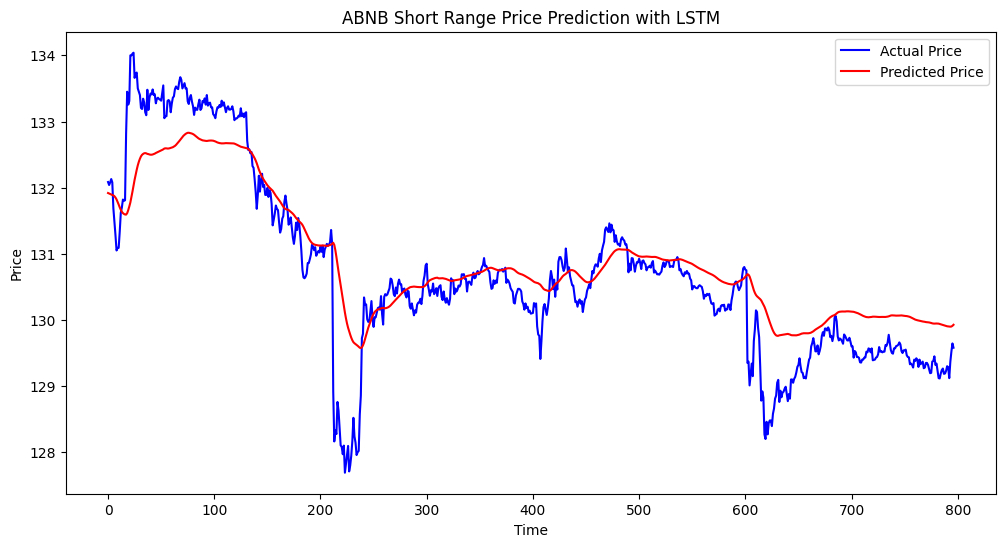

In [135]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predicted, label='Predicted Price', color='red')

plt.title('ABNB Short Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for ABNB

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
mae = mean_absolute_error(y_test_actual, predicted)
mape = np.mean(np.abs((y_test_actual - predicted) / y_test_actual)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 0.6408
MAE: 0.4537
MAPE: 0.35%


## Building LSTM for BKNG




In [137]:
# Replace infinite values with NaN
BKNG_df_sr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    BKNG_df_sr[column].fillna(BKNG_df_sr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(BKNG_df_sr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_bkng = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-137-8dfd463c34ac>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [138]:
print(scaled_df_bkng.head())
print(scaled_df_bkng.shape)
print(scaled_df_bkng.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.784835  0.836309  0.813898  0.177562  0.021000
1  0.802232  0.832948  0.811380  0.171420  0.043356
2  0.804983  0.829940  0.809052  0.171238  0.031019
3  0.804983  0.825738  0.808257  0.190762  0.026812
4  0.817637  0.823707  0.807628  0.179900  0.004350
(2298, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [139]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [140]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_bkng, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [141]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([448, 60, 5])
torch.Size([1790, 60, 5])
torch.Size([448])


torch.Size([1790])

In [142]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([448, 1])


torch.Size([1790, 1])

In [143]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [144]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0824
Epoch [20/100], Loss: 0.0222
Epoch [30/100], Loss: 0.0228
Epoch [40/100], Loss: 0.0140
Epoch [50/100], Loss: 0.0067
Epoch [60/100], Loss: 0.0053
Epoch [70/100], Loss: 0.0046
Epoch [80/100], Loss: 0.0042
Epoch [90/100], Loss: 0.0038
Epoch [100/100], Loss: 0.0037


In [145]:
print(y_test.shape)



torch.Size([448, 1])


#### save the model

In [146]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_bkng_sr.pth')

In [147]:
# Evaluate the model BKNG

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_bkng = test_outputs.cpu().numpy()
    y_test_actual_bkng = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_bkng.shape[0], scaled_df_bkng.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_bkng[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_bkng.shape[0], scaled_df_bkng.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_bkng[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_bkng = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_bkng = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0029


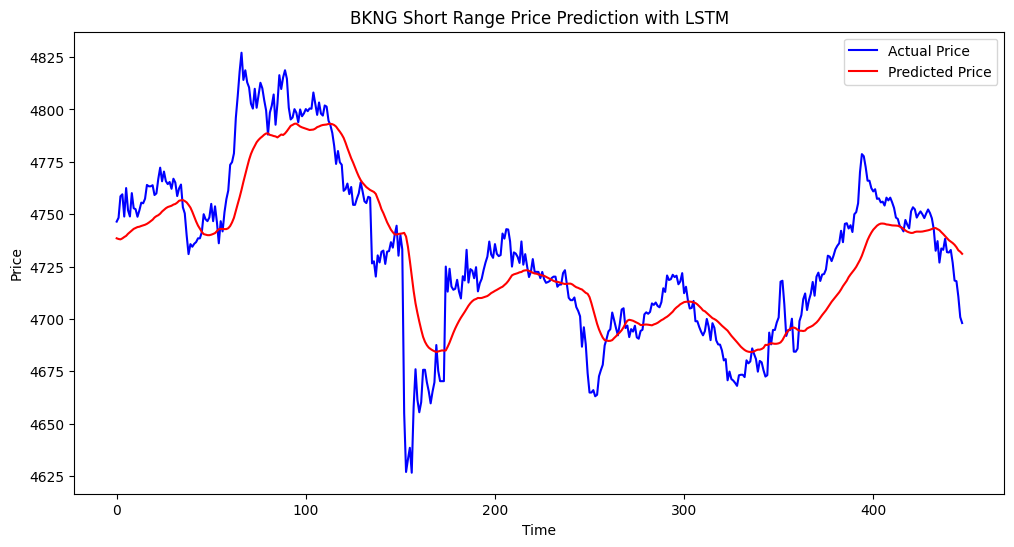

In [148]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_bkng, label='Actual Price', color='blue')
plt.plot(predicted_bkng, label='Predicted Price', color='red')

plt.title('BKNG Short Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for BKNG

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_bkng, predicted_bkng))
mae = mean_absolute_error(y_test_actual_bkng, predicted_bkng)
mape = np.mean(np.abs((y_test_actual_bkng - predicted_bkng) / y_test_actual_bkng)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 20.2159
MAE: 14.7395
MAPE: 0.31%


## Building LSTM for EXPE

In [150]:
# Replace infinite values with NaN
EXPE_df_sr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    EXPE_df_sr[column].fillna(EXPE_df_sr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(EXPE_df_sr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_expe = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-150-6f988a6ff29b>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [151]:
print(scaled_df_expe.head())
print(scaled_df_expe.shape)
print(scaled_df_expe.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.745037  0.742511  0.758948  0.100664  0.047815
1  0.747875  0.741775  0.756471  0.100204  0.027882
2  0.747469  0.739415  0.755419  0.100427  0.039558
3  0.757603  0.737900  0.754373  0.103207  0.054528
4  0.757198  0.738549  0.753356  0.102533  0.005910
(3996, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [152]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [153]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_expe, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [154]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([788, 60, 5])
torch.Size([3148, 60, 5])
torch.Size([788])


torch.Size([3148])

In [155]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([788, 1])


torch.Size([3148, 1])

In [156]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [157]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0734
Epoch [20/100], Loss: 0.0358
Epoch [30/100], Loss: 0.0237
Epoch [40/100], Loss: 0.0073
Epoch [50/100], Loss: 0.0029
Epoch [60/100], Loss: 0.0023
Epoch [70/100], Loss: 0.0017
Epoch [80/100], Loss: 0.0015
Epoch [90/100], Loss: 0.0014
Epoch [100/100], Loss: 0.0013


In [158]:
print(y_test.shape)



torch.Size([788, 1])


In [159]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_expe = test_outputs.cpu().numpy()
    y_test_actual_expe = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_expe.shape[0], scaled_df_expe.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_expe[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_expe.shape[0], scaled_df_expe.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_expe[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_expe = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_expe = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0008


In [160]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_expe_sr.pth')

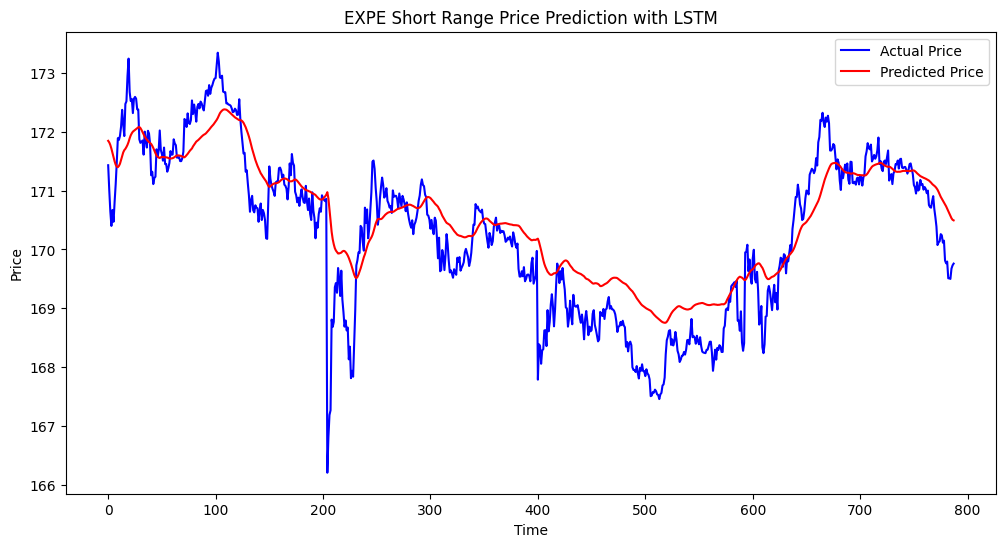

In [161]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_expe, label='Actual Price', color='blue')
plt.plot(predicted_expe, label='Predicted Price', color='red')

plt.title('EXPE Short Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for EXPE


In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_expe, predicted_expe))
mae = mean_absolute_error(y_test_actual_expe, predicted_expe)
mape = np.mean(np.abs((y_test_actual_expe - predicted_expe) / y_test_actual_expe)) * 100    # MAPE in percentage

print(f"RMSE EXPE: {rmse:.4f}")
print(f"MAE EXPE: {mae:.4f}")
print(f"MAPE EXPE: {mape:.2f}%")

RMSE EXPE: 0.6864
MAE EXPE: 0.5141
MAPE EXPE: 0.30%


## Building LSTM for MAR



In [163]:
# Replace infinite values with NaN
MAR_df_sr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    MAR_df_sr[column].fillna(MAR_df_sr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(MAR_df_sr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_mar = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-163-f21878baa62d>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [164]:
print(scaled_df_mar.head())
print(scaled_df_mar.shape)
print(scaled_df_mar.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.175778  0.195622  0.198469  0.527858  0.014001
1  0.193807  0.194466  0.198273  0.526883  0.021213
2  0.195375  0.191835  0.197775  0.526370  0.008306
3  0.204390  0.189762  0.197800  0.513748  0.026945
4  0.214188  0.190021  0.197632  0.531150  0.016815
(3979, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [165]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [166]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_mar, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [167]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([784, 60, 5])
torch.Size([3135, 60, 5])
torch.Size([784])


torch.Size([3135])

In [168]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([784, 1])


torch.Size([3135, 1])

In [169]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [170]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.1169
Epoch [20/100], Loss: 0.0421
Epoch [30/100], Loss: 0.0240
Epoch [40/100], Loss: 0.0053
Epoch [50/100], Loss: 0.0050
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0023
Epoch [80/100], Loss: 0.0018
Epoch [90/100], Loss: 0.0016
Epoch [100/100], Loss: 0.0015


In [171]:
print(y_test.shape)



torch.Size([784, 1])


In [172]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_mar = test_outputs.cpu().numpy()
    y_test_actual_mar = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_mar.shape[0], scaled_df_mar.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_mar[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_mar.shape[0], scaled_df_mar.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_mar[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_mar = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_mar = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0017


In [173]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_mar_sr.pth')

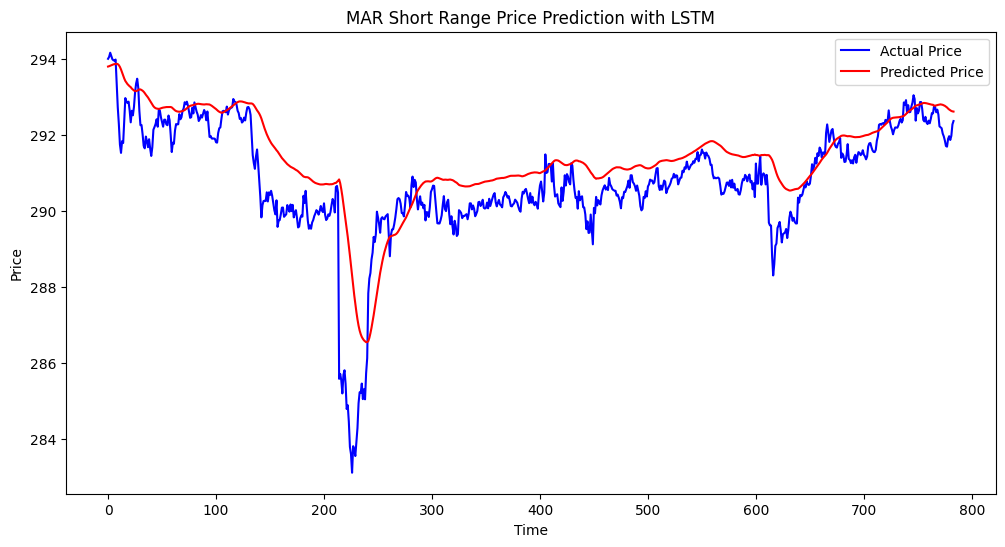

In [174]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_mar, label='Actual Price', color='blue')
plt.plot(predicted_mar, label='Predicted Price', color='red')

plt.title('MAR Short Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for MAR

In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_mar, predicted_mar))
mae = mean_absolute_error(y_test_actual_mar, predicted_mar)
mape = np.mean(np.abs((y_test_actual_mar - predicted_mar) / y_test_actual_mar)) * 100    # MAPE in percentage

print(f"RMSE MAR: {rmse:.4f}")
print(f"MAE MAR: {mae:.4f}")
print(f"MAPE MAR: {mape:.2f}%")

RMSE MAR: 1.0589
MAE MAR: 0.7467
MAPE MAR: 0.26%


# Using ARIMA (Autoregressive Integrated Moving Average)

In [176]:
# import stasmodels.tsa.arima.model as ARIMA

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Arima with multiple featurs
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

## Buliding ARIMA for ABNB

In [177]:
df_arima_abnb = ABNB_df_sr.copy()
df_arima_abnb.head()
print(df_arima_abnb.shape)

(4043, 10)


In [178]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_abnb = df_arima_abnb[[target_variable] + features]
df_arima_abnb.head()



,Close,MA_10,MA_50,RSI,Volume
49,135.589996,135.906400,135.650776,-165.755135,2273
50,135.750000,135.865399,135.615176,-96.818791,99463
51,136.115005,135.852899,135.590876,-352.299620,73280
52,135.962494,135.823749,135.562526,-508.335909,47399
53,136.141998,135.834949,135.532866,558.248165,36505


In [179]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_abnb[target_variable])

ADF Statistic: -3.256196
p-value: {result[1]:4f}
The series is stationary


In [180]:
# Differencing if Needed (Make the Data Stationary)
df_arima_abnb_diff = df_arima_abnb.diff().dropna()

check_stationarity(df_arima_abnb[target_variable])

ADF Statistic: -3.256196
p-value: {result[1]:4f}
The series is stationary


In [181]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(f'{label}: {value}')
  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

In [182]:
check_stationarity(df_arima_abnb_diff[target_variable])

ADF Test Statistic: -24.553339379066603
p-value: 0.0
#Lags Used: 7
Number of Observations Used: 4034
The series is stationary


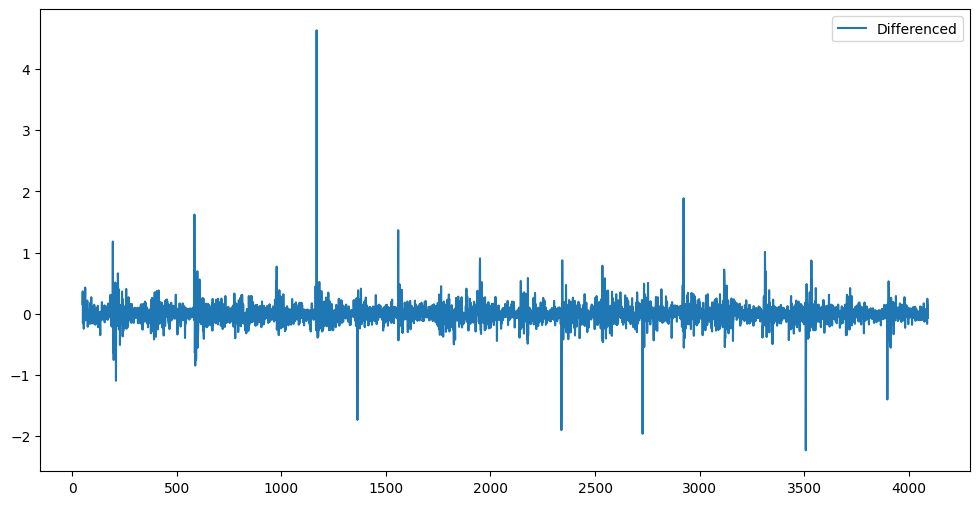

In [183]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_abnb_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [184]:
# split Data into Training & Testing
train_size = int(len(df_arima_abnb)*0.8)
train, test = df_arima_abnb.iloc[:train_size], df_arima_abnb.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [185]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [186]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_abnb_sr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [187]:
# Make predictions
prediction_abnb = model_fit.forecast(steps=len(y_test), exog=X_test)

In [188]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 0.3655
MAE: 0.2520
MAPE: 0.19%


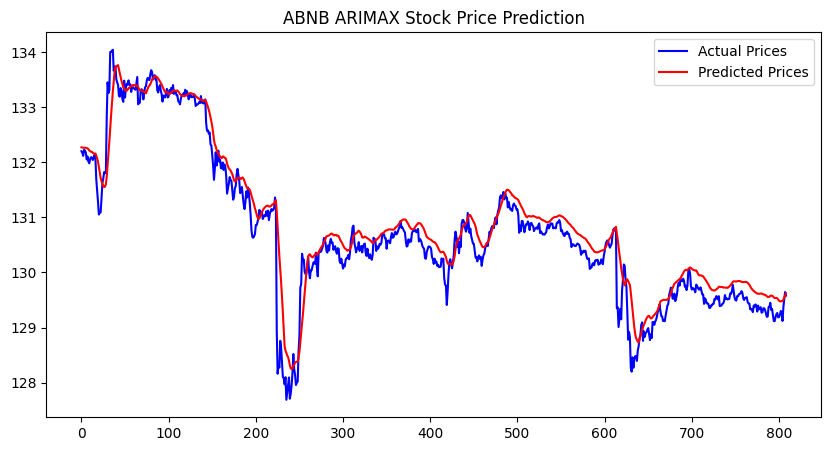

In [189]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_abnb)), prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Stock Price Prediction")
plt.show()

In [190]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1634.436, Time=6.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1614.670, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1628.594, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1628.708, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1616.574, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1634.104, Time=4.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1636.077, Time=7.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1626.722, Time=2.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1626.966, Time=0.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1638.663, Time=4.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1639.636, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1638.072, Time=2.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1636.065, Time=3.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1641.537, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1628.881, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-1639.970, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-1640.546, Time=1.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1637.950, Time=1.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-1637.963, Time=0.64 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 39.385 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3234
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 824.768
Date:                Wed, 05 Feb 2025   AIC                          -1641.537
Time:                        22:48:21   BIC                          -1617.212
Sample:                             0   HQIC                         -1632.820
                               - 3234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0702      0.009      7.880      0.000       0.05

In [191]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [192]:
# Make prediction
final_prediction_abnb = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - final_prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.3572
MAE: 0.2520
MAPE: 0.19%


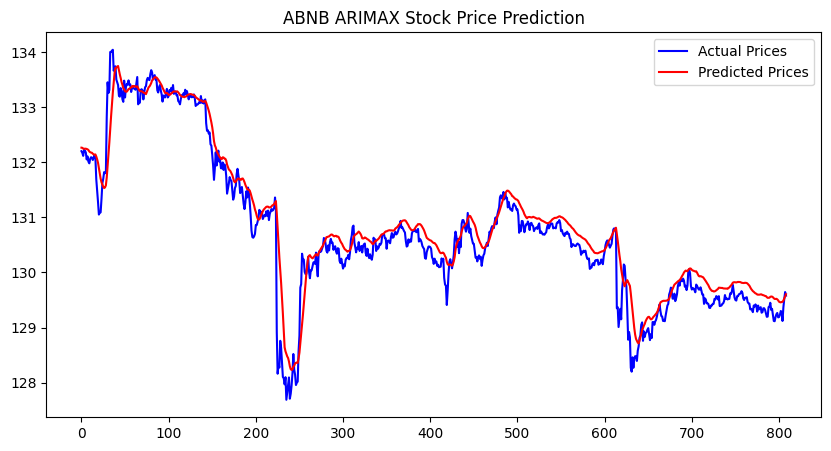

In [193]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_abnb)), final_prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for BKNG

In [194]:
df_arima_bkng = BKNG_df_sr.copy()
df_arima_bkng.head()
print(df_arima_bkng.shape)

(2298, 10)


In [195]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_bkng = df_arima_bkng[[target_variable] + features]
df_arima_bkng.head()



,Close,MA_10,MA_50,RSI,Volume
49,4894.259766,4908.459668,4885.855508,-232.276438,692
50,4900.770020,4907.264648,4885.017510,-2027.350081,1319
51,4901.799805,4906.194629,4884.242510,-2080.357143,973
52,4901.799805,4904.700586,4883.978105,3624.819103,855
53,4906.535156,4903.978125,4883.768613,450.893598,225


In [196]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_bkng[target_variable])

ADF Statistic: -2.521860
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [197]:
# Differencing if Needed (Make the Data Stationary)
df_arima_bkng_diff = df_arima_bkng.diff().dropna()

check_stationarity(df_arima_bkng_diff[target_variable])

ADF Statistic: -55.256380
p-value: {result[1]:4f}
The series is stationary


In [198]:
check_stationarity(df_arima_bkng_diff[target_variable])

ADF Statistic: -55.256380
p-value: {result[1]:4f}
The series is stationary


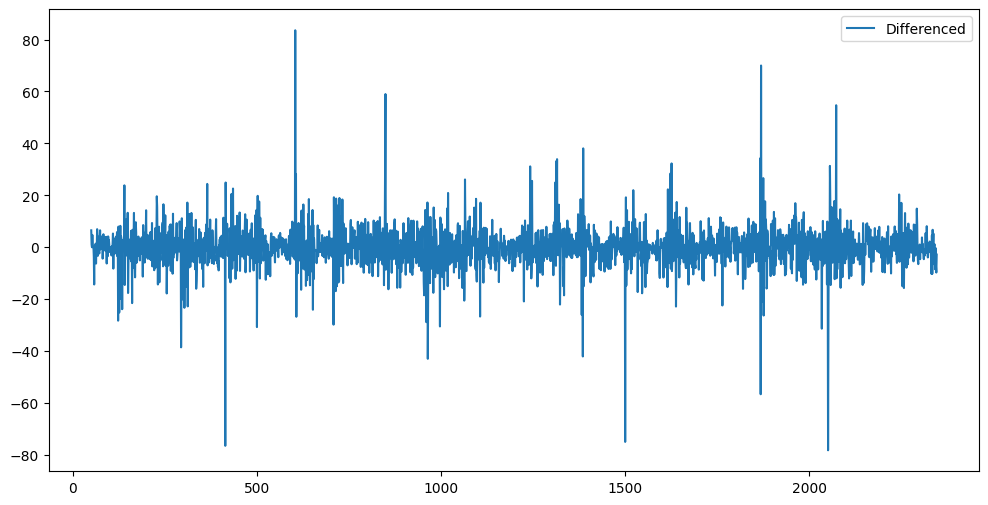

In [199]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_bkng_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [200]:
# split Data into Training & Testing
train_size = int(len(df_arima_bkng)*0.8)
train, test = df_arima_bkng.iloc[:train_size], df_arima_bkng.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [201]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [202]:
#import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_bkng_sr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [203]:
# Make predictions
prediction_bkng = model_fit.forecast(steps=len(y_test), exog=X_test)

In [204]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_bkng))
mae = mean_absolute_error(y_test, prediction_bkng)
mape = np.mean(np.abs((y_test - prediction_bkng) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of BKNG: {rmse:.4f}")
print(f"MAE of BKNG: {mae:.4f}")
print(f"MAPE of BKNG: {mape:.2f}%")

RMSE of BKNG: 17.6424
MAE of BKNG: 13.7007
MAPE of BKNG: 0.29%


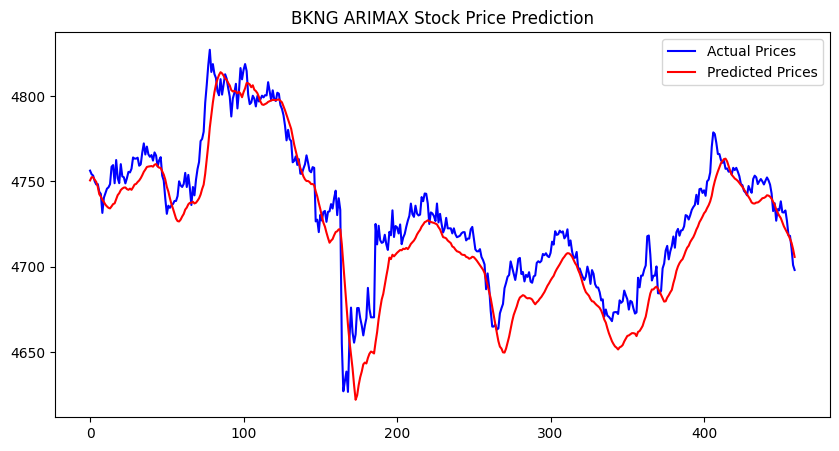

In [205]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_bkng)), prediction_bkng, label="Predicted Prices", color="red")
plt.legend()
plt.title("BKNG ARIMAX Stock Price Prediction")
plt.show()

In [206]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13016.561, Time=2.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13065.126, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13011.968, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13015.695, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13063.280, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13013.221, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13013.355, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13013.578, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13010.193, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13011.436, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13011.573, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13013.925, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13011.753, Time=0.40 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.875 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1838
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -6503.096
Date:                Wed, 05 Feb 2025   AIC                          13010.193
Time:                        22:48:38   BIC                          13021.225
Sample:                             0   HQIC                         13014.261
                               - 1838                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1719      0.012    -14.886      0.000      -0.195

In [207]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [208]:
# Make prediction
final_prediction_bkng = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_bkng))
mae = mean_absolute_error(y_test, prediction_bkng)
mape = np.mean(np.abs((y_test - final_prediction_bkng) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 17.6272
MAE: 13.7007
MAPE: 0.29%


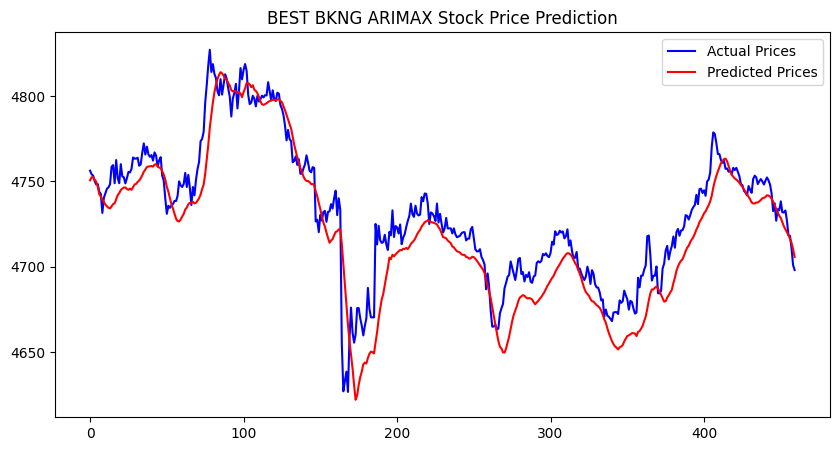

In [209]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_bkng)), final_prediction_bkng, label="Predicted Prices", color="red")
plt.legend()
plt.title("BEST BKNG ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for EXPE

In [210]:
df_arima_expe = EXPE_df_sr.copy()
df_arima_expe.head()
print(df_arima_expe.shape)

(3996, 10)


In [211]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_expe = df_arima_expe[[target_variable] + features]
df_arima_expe.head()



,Close,MA_10,MA_50,RSI,Volume
49,184.589996,184.698502,184.599991,-411.758018,7377
50,184.660004,184.681502,184.545791,-605.419004,4345
51,184.649994,184.627000,184.522791,-511.603151,6121
52,184.899994,184.592000,184.499891,658.582701,8398
53,184.889999,184.606999,184.477641,375.001060,1003


In [212]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_expe[target_variable])

ADF Statistic: -1.256435
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [213]:
# Differencing if Needed (Make the Data Stationary)
df_arima_expe_diff = df_arima_expe.diff().dropna()

check_stationarity(df_arima_expe_diff[target_variable])

ADF Statistic: -64.881389
p-value: {result[1]:4f}
The series is stationary


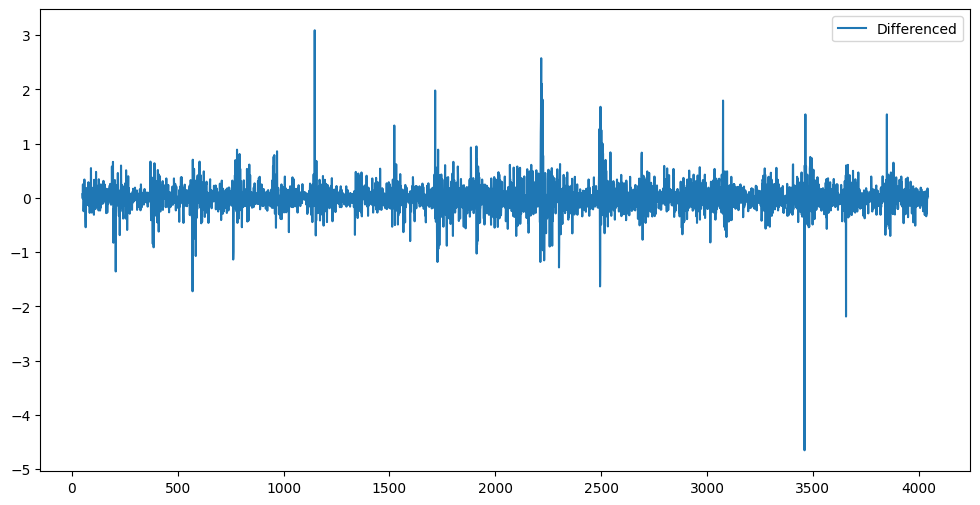

In [214]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_expe_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [215]:
# split Data into Training & Testing
train_size = int(len(df_arima_expe)*0.8)
train, test = df_arima_expe.iloc[:train_size], df_arima_expe.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [216]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [217]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_expe_sr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [218]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_expe_sr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [219]:
# Make predictions
prediction_expe = model_fit.forecast(steps=len(y_test), exog=X_test)

In [220]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of EXPE: {rmse:.4f}")
print(f"MAE of EXPE: {mae:.4f}")
print(f"MAPE of EXPE: {mape:.2f}%")

RMSE of EXPE: 0.4242
MAE of EXPE: 0.2948
MAPE of EXPE: 0.17%


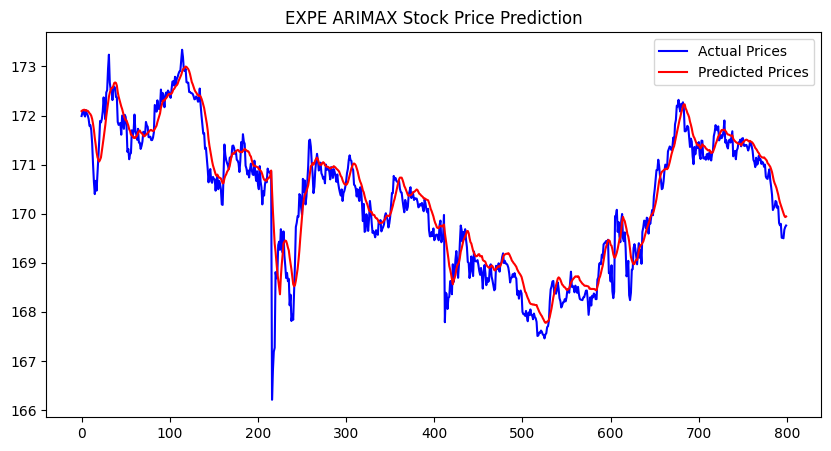

In [221]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_expe)), prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("EXPE ARIMAX Stock Price Prediction")
plt.show()

In [222]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=417.166, Time=5.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=416.236, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=418.181, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=418.184, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=414.971, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=420.121, Time=0.81 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.221 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3196
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -206.486
Date:                Wed, 05 Feb 2025   AIC                            414.971
Time:                        22:48:56   BIC                            421.040
Sample:                             0   HQIC                           417.147
                               - 3196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0666      0.001    124.235      0.000       0.066  

In [223]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [224]:
# Make prediction
final_prediction_expe = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - final_prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.4237
MAE: 0.2948
MAPE: 0.17%


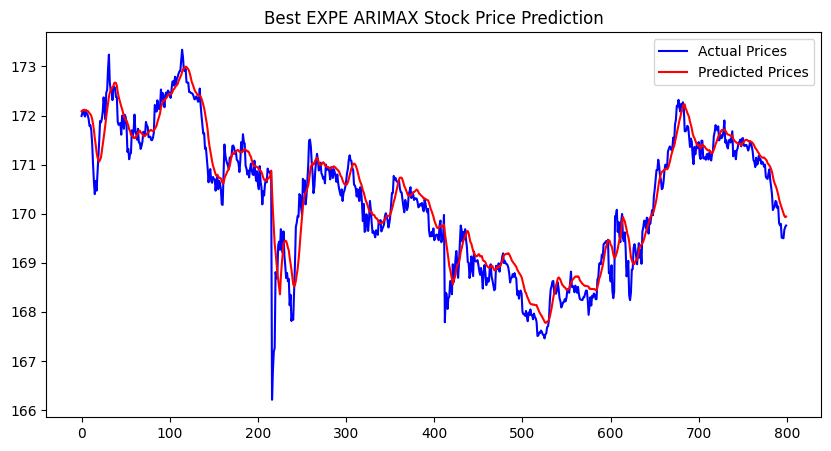

In [225]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_expe)), final_prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best EXPE ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for MAR

In [226]:
df_arima_mar = MAR_df_sr.copy()
df_arima_mar.head()
print(df_arima_mar.shape)

(3979, 10)


In [227]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_mar = df_arima_mar[[target_variable] + features]
df_arima_mar.head()



,Close,MA_10,MA_50,RSI,Volume
49,273.899994,274.527997,274.677206,-55.750149,4307
50,274.359985,274.498996,274.672405,-185.034602,6470
51,274.399994,274.432996,274.660205,-253.118444,2599
52,274.630005,274.380997,274.660805,-1927.146927,8189
53,274.880005,274.387497,274.656705,380.894253,5151


In [228]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_mar[target_variable])

ADF Statistic: -0.959819
p-value: {result[1]:4f}
The series is not stationary: Differencing is needed


In [229]:
# Differencing if Needed (Make the Data Stationary)
df_arima_mar_diff = df_arima_mar.diff().dropna()

check_stationarity(df_arima_mar_diff[target_variable])

ADF Statistic: -29.989066
p-value: {result[1]:4f}
The series is stationary


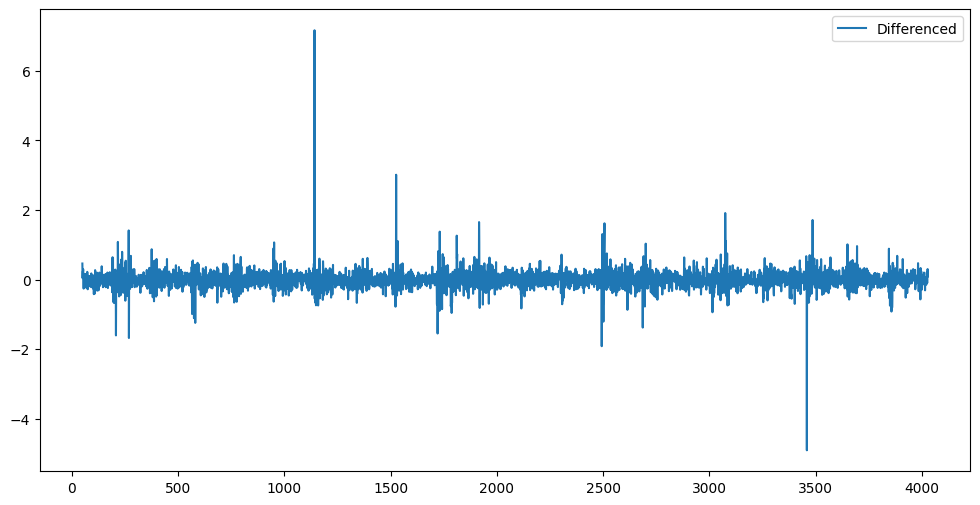

In [230]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_mar_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [231]:
# split Data into Training & Testing
train_size = int(len(df_arima_mar)*0.8)
train, test = df_arima_mar.iloc[:train_size], df_arima_mar.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [232]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [233]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_mar_sr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [234]:
# Make predictions
prediction_mar = model_fit.forecast(steps=len(y_test), exog=X_test)

In [235]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of MAR: {rmse:.4f}")
print(f"MAE of MAR: {mae:.4f}")
print(f"MAPE of MAR: {mape:.2f}%")

RMSE of MAR: 0.5830
MAE of MAR: 0.4084
MAPE of MAR: 0.14%


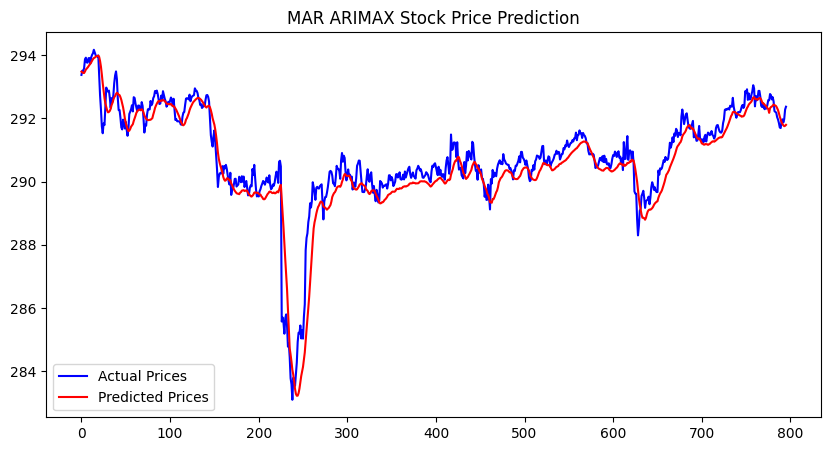

In [243]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_mar)), prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("MAR ARIMAX Stock Price Prediction")
plt.show()

In [237]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=897.907, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=899.313, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=899.301, Time=1.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0]             : AIC=897.466, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=896.676, Time=3.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=898.168, Time=3.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=898.977, Time=1.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=900.992, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=901.059, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0]             : AIC=896.671, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0]             : AIC=898.903, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0]             : AIC=898.913, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,0)[0]             : AIC=898.153, Time=4.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,0,0)[0]             : AIC=898.187, Time=1.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,2)(0,0,0)[0]             : AIC=900.627, Time=0.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,0)(0,0,0)[0]             : AIC=900.687, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(0,0,0)[0]             : AIC=898.355, Time=2.66 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 32.729 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3183
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -445.336
Date:                Wed, 05 Feb 2025   AIC                            896.671
Time:                        22:49:39   BIC                            914.867
Sample:                             0   HQIC                           903.197
                               - 3183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7961      0.126      6.336      0.000       0.550 

In [238]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [239]:
# Make prediction
final_prediction_mar = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - final_prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.5830
MAE: 0.4084
MAPE: 0.14%


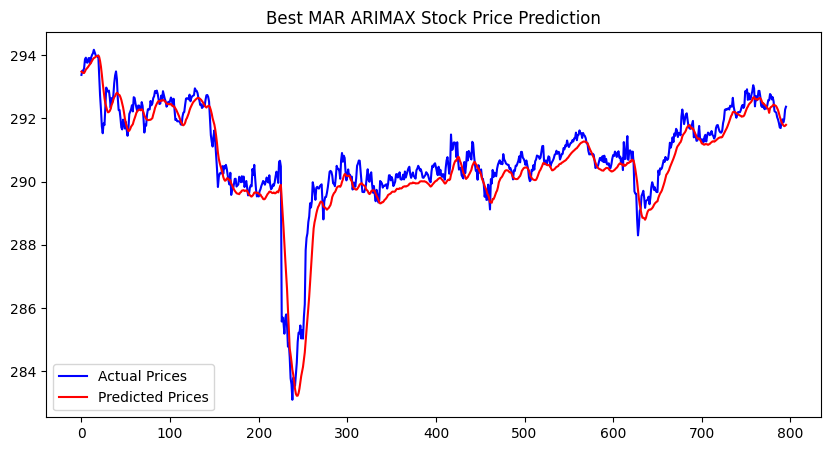

In [242]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_mar)), final_prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best MAR ARIMAX Stock Price Prediction")
plt.show()

## Model Tuning:
    Fine-tune model hyperparameters to optimize performance

# Using Prophet: Facebook's time series forecasting library

**Prophet** is a great alternative to ARIMA for forecasting stock prices when you have multiple features

In [241]:
from prophet import Prophet
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# Load Dataset
df_prophet_abnb = ABNB_df_sr.copy()
print(df_prophet_abnb.head())
print(df_prophet_abnb.shape)

In [ ]:
# Select features
features = ['MA_10', 'MA_50', 'RSI', 'Volume']
target_col = 'Close'

# Rename the target variable to 'y' and date column to 'ds' ((Prophet's required format))
df_prophet_abnb.rename(columns={"Date":"ds", target_col:"y"}, inplace=True)
df_prophet_abnb.head()

# Add additional features
df_prophet_abnb = df_prophet_abnb[['ds','y'] + features]
df_prophet_abnb.head()


In [ ]:
# Before fitting the model, remove the timezone from the 'ds' column:
df_prophet_abnb['ds'] = df_prophet_abnb['ds'].dt.tz_localize(None)

In [ ]:
# Split the data into Training and Testing
train_size = int(len(df_prophet_abnb)*0.8)
train, test = df_prophet_abnb.iloc[:train_size], df_prophet_abnb.iloc[train_size:]

# initialize and tarin the model
model = Prophet()
for feature in features:
  model.add_regressor(feature) # add each feature variable
model.fit(train)  #ValueError: Column ds has timezone specified, which is not supported. Remove timezone.


In [ ]:
# Make Future Prediction
# Set periods to 0 and frequency to match your data
predict_feature = model.make_future_dataframe(periods=len(test), freq='2min')

# Ensure 'ds' columns have the same type and format before filtering
predict_feature['ds'] = pd.to_datetime(predict_feature['ds']).dt.tz_localize(None)
#test['ds'] = pd.to_datetime(test['ds']).dt.tz_localize(None)


predict_feature = predict_feature[predict_feature['ds'].isin(test.index)] # Filter to include only dates present in test data

predict_feature = pd.merge(predict_feature, df_prophet_abnb[['ds'] + features], on='ds', how='left')

# Fill any remaining NaN values with backfill or other methods as appropriate:

predict_feature.fillna(method='ffill', inplace=True)
predict_feature.fillna(method='bfill', inplace=True)

#for feature in features:
 # predict_feature[feature] = df_prophet_abnb[feature]

forecast = model.predict(predict_feature)

# Instead of using test["ds"] directly, get the common dates between forecast and test
#common_dates = forecast['ds'].isin(test['ds'])
#test = test.set_index('ds')

# extract Predictions
prediction_prophet_abnb = forecast.set_index('ds').loc[test.index.to_list(),['yhat']]

In [ ]:
# Evaluate the model performance

rmse = np.sqrt(mean_squared_error(test['y'], prediction_prophet_abnb['yhat']))
mae = mean_absolute_error(test['y'], prediction_prophet_abnb['yhat'])
mape = np.mean(np.abs((test['y'] - prediction_prophet_abnb['yhat']) / test['y'])) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
